### Anonymized & encrypted data collected via Intrusion Prevention (IPS) technology that is part of Quick Heal’s products
** PART 1 **

**Objective 1**

    Identifies data quality issues across the data set:-
        - Return row number & field-id where the data quality issue is detected

In [1]:
#import relevant modules
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
import pandas_profiling

import statsmodels.formula.api as sm
import scipy.stats as stat
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

from sklearn.preprocessing import imputation
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.nan)
np.set_printoptions(precision=3)

sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\lenovo\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\lenovo\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\lenovo\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 497, in start
    self.io_loop.start()
  File "C:\Use

In [2]:
#importing IPS Data
IPS_df = pd.read_excel('Data_Science_Problem-external.xlsx', encoding = 'utf-8')

In [3]:
#Removing garbage columns and keeping on 35 relevent columns
IPS_df = IPS_df[['dir',
'local_ip',
'lp',
'mod',
'nm',
'prod',
'productId',
'protocol',
'ref',
'remote_ip',
'rp',
'sigid',
'sigwid',
'timestamp',
'ua',
'url',
'company_name',
'cust_id',
'last_vdb_timestamp',
'machine_type',
'os_arch',
'os_id',
'os_name',
'pkhash',
'product_name',
'product_version',
'sp_major_version',
'sp_minor_version',
'trial_copy',
'vdb_timestamp',
'vertical_id',
'city_name',
'country_name',
'real_region_name']]

#### Data Summary:-

    A. There are 7999 rows including the NULL (NA) values.
    B. Therse seems to have lots of inconsistency  in data.
        "cat_summary" refers to column wise number of NULLs in the each column under "NMISS".
    C. All the variables are categorical variables, either ordered or un-ordered.

In [4]:
#Glancing at the data -
IPS_df.head()

,dir,local_ip,lp,mod,nm,prod,productId,protocol,ref,remote_ip,rp,sigid,sigwid,timestamp,ua,url,company_name,cust_id,last_vdb_timestamp,machine_type,os_arch,os_id,os_name,pkhash,product_name,product_version,sp_major_version,sp_minor_version,trial_copy,vdb_timestamp,vertical_id,city_name,country_name,real_region_name
0,in,124.9.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,NaN,qhpdt4,NaN,NaN,90.811.108.100,62390,NaN,qhcltr-1,2019-03-01T14:34:51.000Z,NaN,NaN,qhcomp1,4e4789c041c1d9517f0b5648b3366a,"28 February, 2019 (10:52:05)",DESKTOP,64Bit,50040,Windows Server 2012 R2 64 bit,7fb5ef7c0113bd557ada5c0445ec91,qhpname3,qhpver0,0,0,0,"01 March, 2019 (08:08:51)",government,city141,country4,region31
1,in,83.131.177.201,734034,blk,SMB/EternalBlue.UN!SP.31780,UN,qhpdt6,SMB,NaN,19.131.177.921.,49915,31780,qhcltr4,2019-03-01T14:34:51.000Z,NaN,NaN,qhcomp1,7a30bd86e7d0a29a98244774cb2d2b7a,"28 February, 2019 (10:52:05)",DESKTOP,32Bit,50016,Windows XP Professional,5194279487c0779a605e969aa950d338,qhpname6,qhpver0,3,0,0,"01 March, 2019 (08:08:31)",it,city170,country4,region40
2,in,124.9.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,NaN,qhpdt4,NaN,NaN,90.811.108.100,62390,NaN,qhcltr-1,2019-03-01T14:34:51.000Z,NaN,NaN,qhcomp1,4e4789c041c1d9517f0b5648b3366a,"28 February, 2019 (10:52:05)",DESKTOP,64Bit,50040,Windows Server 2012 R2 64 bit,7fb5ef7c0113bd557ada5c0445ec91,qhpname3,qhpver0,0,0,0,"01 March, 2019 (08:08:51)",finance,city141,country4,region31
3,in,83.131.177.277,734034,abc,SMB/EternalBlue.UN!SP.31780,UN,qhpdt6,SMB,NaN,19.131.177.921.,49915,31780,qhcltr4,2019-03-01T14:34:51.000Z,NaN,NaN,qhcomp1,7a30bd86e7d0a29a98244774cb2d2b7a,"28 February, 2019 (10:52:05)",DESKTOP,32Bit,50016,Windows XP Professional,5194279487c0779a605e969aa950d338,qhpname6,qhpver0,3,0,0,"01 March, 2019 (08:08:31)",it,city170,country4,region40
4,in,109.9.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,NaN,qhpdt9,NaN,NaN,10.195.154.98,414811,NaN,qhcltr-1,2019-03-04T06:27:25.000Z,NaN,NaN,qhcomp1,8435d926acff7568edb434b5abdd917a,"02 March, 2019 (08:03:25)",DESKTOP,89,50033,Windows 7 64 bit,df4c090f2a82fc8323f90bb6ee374c19,qhpname7,qhpver0,1,0,0,"03 March, 2019 (08:09:50)",finance,city-1,country4,region-1


In [5]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=IPS_df.apply(lambda x: cat_summary(x))

In [6]:
cat_summary

,dir,local_ip,lp,mod,nm,prod,productId,protocol,ref,remote_ip,rp,sigid,sigwid,timestamp,ua,url,company_name,cust_id,last_vdb_timestamp,machine_type,os_arch,os_id,os_name,pkhash,product_name,product_version,sp_major_version,sp_minor_version,trial_copy,vdb_timestamp,vertical_id,city_name,country_name,real_region_name
N,7999,7999,7999,7999,7999,7563,7999,7563,2,7999,7999,7563,7999,7999,16,15,7999,7993,7999,7514,7514,7514,7514,7999,7999,7999,7514,7514,7514,7999,7496,7999,7999,7999
NMISS,2,2,2,2,2,438,2,438,7999,2,2,438,2,2,7985,7986,2,8,2,487,487,487,487,2,2,2,487,487,487,2,505,2,2,2
ColumnsNames,in 5823 out 2174 gg...,8.97.177.201 260 236.9.31.811. 25...,445 5263 94444 440 123 9...,blk 7951 mon 8 nnn ...,SMB/CVE-2017-0147-EC.WIN!KP.1912 2491 H...,UN 2798 WIN 2608 CNC ...,qhpdt2 1752 qhpdt6 1723 qhpdt9 141...,SMB 5301 HTTP 2165 NTP 96 opi ...,"poi 1 lk 1 Name: ref, dtype: int64",105.240.136.197 640 143.251.137.187 53...,3333 2149 123 40 80 14 5...,1912 2490 4843 2147 31780 ...,qhcltr4 4938 qhcltr0 2505 qhcltr-1 ...,2019-03-04T06:28:18.000Z 276 2019-03-04T06:...,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,www.bing.com/favicon.ico ...,qhcomp1 6791 qhcomp0 722 qhcomp-1 ...,d7df250e6b1c37748c215b7653839ac6 256 e3e083...,"02 March, 2019 (08:03:05) 2433 02 March...",DESKTOP 6444 LAPTOP 1067 dfdfdf ...,64Bit 3813 32Bit 3696 dfdf 1 xyz ...,50032 2690 50033 2503 50016 963 5...,Windows 7 ...,7fdc97984ce32048763804e29f8b047d 256 748612...,qhpname7 1922 qhpname4 1869 qhpname6 ...,qhpver0 6791 qhpver1 722 qhpver-1 ...,1 3976 0 2554 3 ...,0 7511 iiiiii 1 [po 1 9...,0 6717 1 792 asd 1 i ...,"03 March, 2019 (08:09:34) 3571 03 March...",finance 872 fmcg 850 gove...,city-1 1708 city124 630 city144 62...,country4 7634 country0 186 country-1 ...,region-1 1625 region26 1302 region42 ...


In [7]:
IPS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8001 entries, 0 to 8000
Data columns (total 34 columns):
dir                   7999 non-null object
local_ip              7999 non-null object
lp                    7999 non-null object
mod                   7999 non-null object
nm                    7999 non-null object
prod                  7563 non-null object
productId             7999 non-null object
protocol              7563 non-null object
ref                   2 non-null object
remote_ip             7999 non-null object
rp                    7999 non-null object
sigid                 7563 non-null object
sigwid                7999 non-null object
timestamp             7999 non-null object
ua                    16 non-null object
url                   15 non-null object
company_name          7999 non-null object
cust_id               7993 non-null object
last_vdb_timestamp    7999 non-null object
machine_type          7514 non-null object
os_arch               7514 non-null obje

### Identifying data quality issues across the data set

    A. Row number 118 and 6141 have complete NULL (NA) records - the rows can be removed.
    B. Among the 13 non-nullable columns, 4 columns have violated the constraint
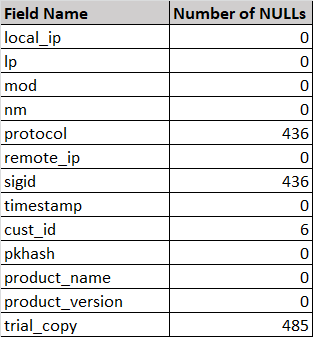


    C. Protocol - Communication protocol and sigid - Unique ID of signature have same 436 rows having NULL (NA) values.
    D. Data Problems can also be seen in the categorical values -
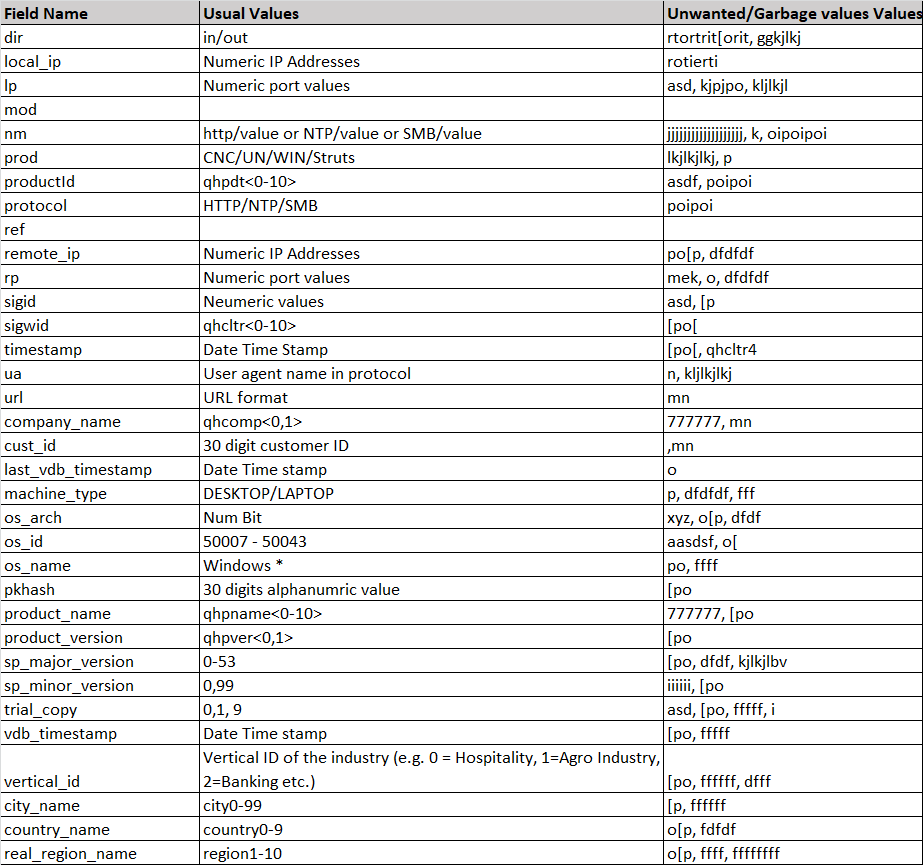

** Protocol - Communication protocol and sigid - Unique ID of signature **

    have 436 EMPTY/NULL values

In [8]:
IPS_df[IPS_df.protocol.isnull() == True].index.values

array([   0,    2,    4,    5,   20,   21,   58,  118,  136,  247,  248,
        266,  267,  285,  300,  469,  470,  481,  482,  493,  504,  553,
        554,  555,  564,  565,  566,  575,  576,  587,  588,  599,  600,
        611,  612,  623,  624,  639,  640,  743,  813,  921,  922,  931,
        932,  941,  942,  943,  957,  958,  959,  973,  974,  993,  994,
       1039, 1054, 1069, 1080, 1091, 1102, 1113, 1125, 1137, 1138, 1146,
       1147, 1155, 1165, 1175, 1176, 1198, 1199, 1221, 1228, 1235, 1251,
       1267, 1268, 1269, 1283, 1284, 1285, 1299, 1300, 1310, 1311, 1321,
       1322, 1332, 1333, 1343, 1384, 1425, 1437, 1501, 1502, 1509, 1510,
       1663, 1664, 1665, 1674, 1675, 1676, 1685, 1686, 1691, 1692, 1697,
       1698, 1704, 1705, 1769, 1770, 1776, 1777, 1805, 1818, 1831, 1840,
       1861, 1862, 1999, 2000, 2137, 2149, 2355, 2356, 2431, 2432, 2507,
       2515, 2523, 2536, 2571, 2572, 2573, 2589, 2590, 2591, 2607, 2620,
       2789, 2797, 2823, 2824, 2898, 2899, 2973, 29

In [9]:
IPS_df[IPS_df.sigid.isnull() == True].index.values

array([   0,    2,    4,    5,   20,   21,   58,  118,  136,  247,  248,
        266,  267,  285,  300,  469,  470,  481,  482,  493,  504,  553,
        554,  555,  564,  565,  566,  575,  576,  587,  588,  599,  600,
        611,  612,  623,  624,  639,  640,  743,  813,  921,  922,  931,
        932,  941,  942,  943,  957,  958,  959,  973,  974,  993,  994,
       1039, 1054, 1069, 1080, 1091, 1102, 1113, 1125, 1137, 1138, 1146,
       1147, 1155, 1165, 1175, 1176, 1198, 1199, 1221, 1228, 1235, 1251,
       1267, 1268, 1269, 1283, 1284, 1285, 1299, 1300, 1310, 1311, 1321,
       1322, 1332, 1333, 1343, 1384, 1425, 1437, 1501, 1502, 1509, 1510,
       1663, 1664, 1665, 1674, 1675, 1676, 1685, 1686, 1691, 1692, 1697,
       1698, 1704, 1705, 1769, 1770, 1776, 1777, 1805, 1818, 1831, 1840,
       1861, 1862, 1999, 2000, 2137, 2149, 2355, 2356, 2431, 2432, 2507,
       2515, 2523, 2536, 2571, 2572, 2573, 2589, 2590, 2591, 2607, 2620,
       2789, 2797, 2823, 2824, 2898, 2899, 2973, 29

** cust_id - Unique identifer of customer **

    has 6 EMPTY/NULL values

In [10]:
IPS_df[IPS_df.cust_id.isnull() == True].index.values

array([ 118, 6141, 7711, 7712, 7713, 7714, 7715, 7716], dtype=int64)

** trial_copy - Is the product installed is a trial build (0, 1) **

    has 485 EMPTY/NULL values

In [11]:
IPS_df[IPS_df.trial_copy.isnull() == True].index.values

array([ 118,  502,  513,  585,  586,  597,  598,  609,  610,  621,  622,
        623,  639,  694,  704,  716,  726,  892,  903,  979,  999, 1043,
       1046, 1058, 1061, 1070, 1081, 1115, 1127, 1176, 1195, 1196, 1199,
       1218, 1219, 1227, 1234, 1249, 1265, 1343, 1344, 1383, 1384, 1385,
       1424, 1426, 1429, 1430, 1431, 1438, 1441, 1442, 1443, 1469, 1495,
       1664, 1675, 1703, 1710, 1715, 1732, 1750, 1762, 1783, 1784, 1791,
       1794, 1795, 1802, 1853, 1854, 1859, 1860, 1870, 2008, 2145, 2157,
       2269, 2319, 2328, 2330, 2331, 2345, 2347, 2348, 2358, 2359, 2434,
       2435, 2527, 2540, 2551, 2552, 2562, 2563, 2608, 2612, 2621, 2625,
       2634, 2706, 2778, 2784, 2836, 2837, 2838, 2839, 2840, 2841, 2842,
       2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2853,
       2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2864,
       2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2874, 2875,
       2876, 2877, 2878, 2879, 2880, 2881, 2882, 28

#### Univariate Analysis - BAR Plot demonstrating data problems in Categorical values -

    Following Garbage values can be found in the datasets -
    
    "rtortrit[orit,ggkjlkj,rotierti,asd,kjpjpo,kljlkjl,jjjjjjjjjjjjjjjjjjj,
    k,oipoipoi,lkjlkjlkj,p,asdf,poipoi,po[p,dfdfdf,mek,o,[p,[po[,[p[,qhcltr4,
    n,kljlkjlkj,mn,mno,fff,xyz,o[p,dfdf,aasdsf,o[,po,ffff,[po,777777,kjlkjlbv,
    iiiiii,fffff,i,ffffff,dfff,fdfdf,ffffffff"

In [12]:
cat_list = ['dir',
'mod',
'prod',
'productId',
'protocol',
'ref',
'sigid',
'sigwid',
'ua',
'company_name',
'machine_type',
'os_arch',
'os_id',
'os_name',
'product_name',
'product_version',
'sp_major_version',
'trial_copy',
'vertical_id',
'country_name']

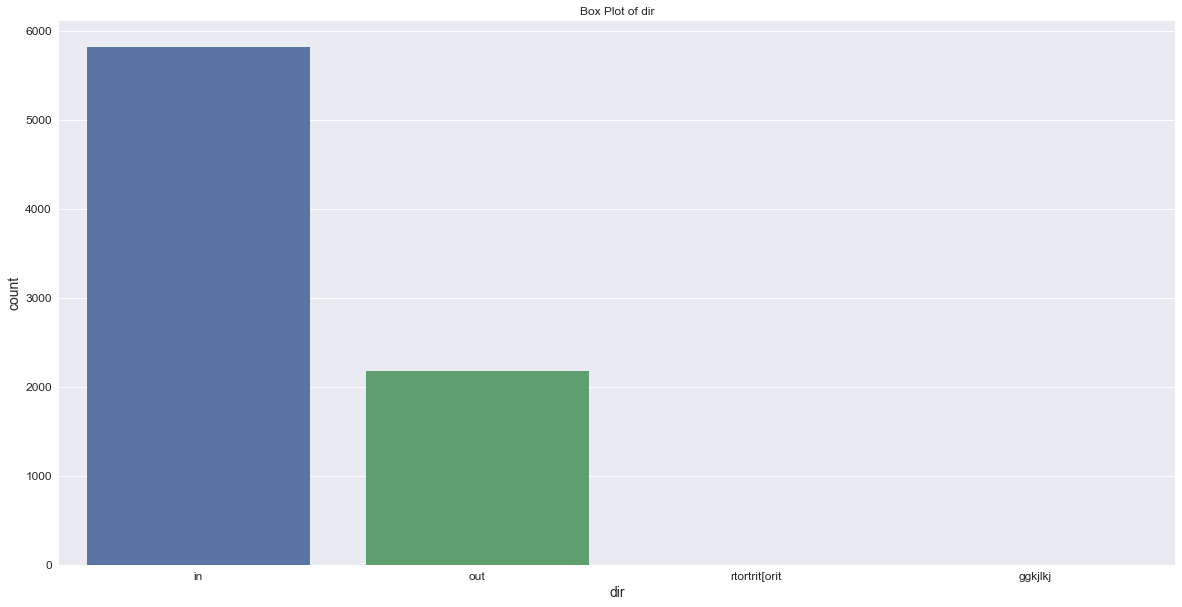

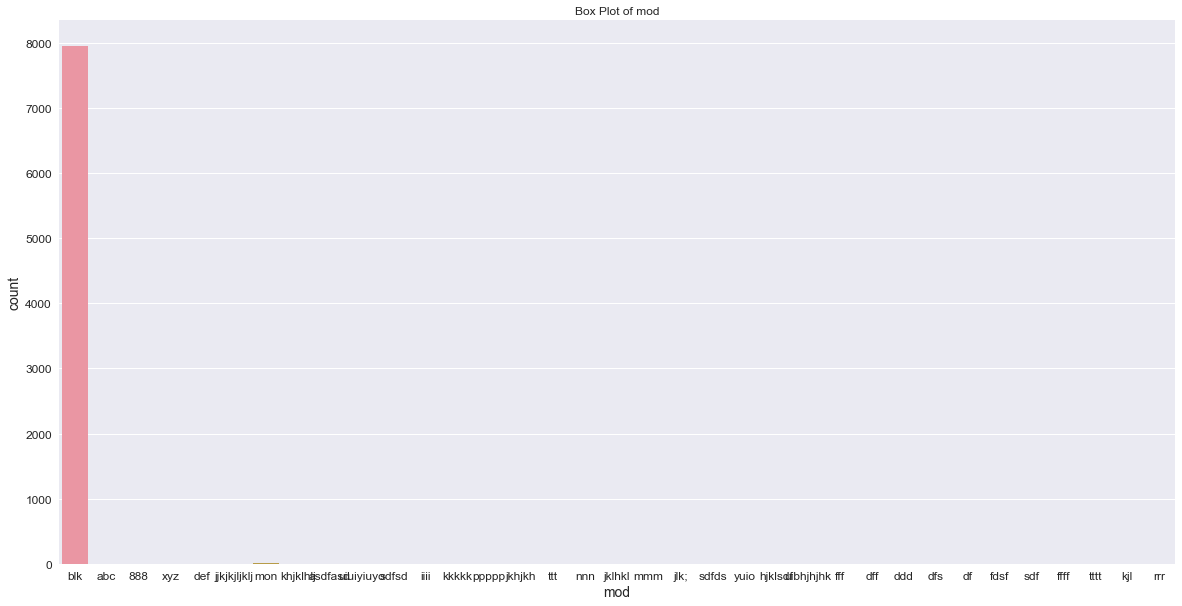

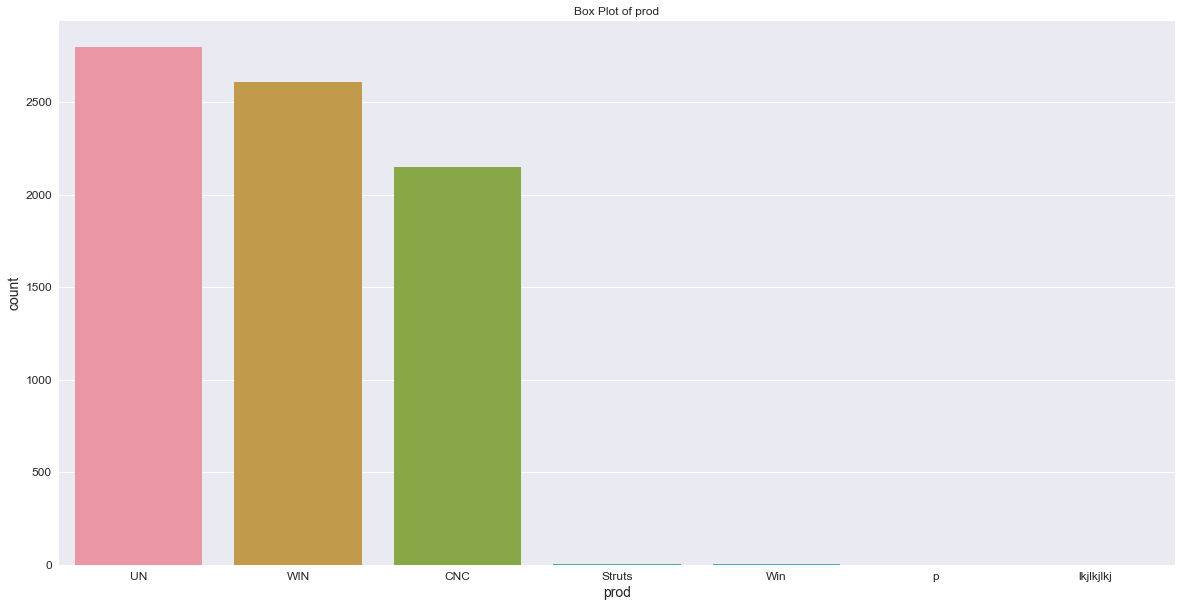

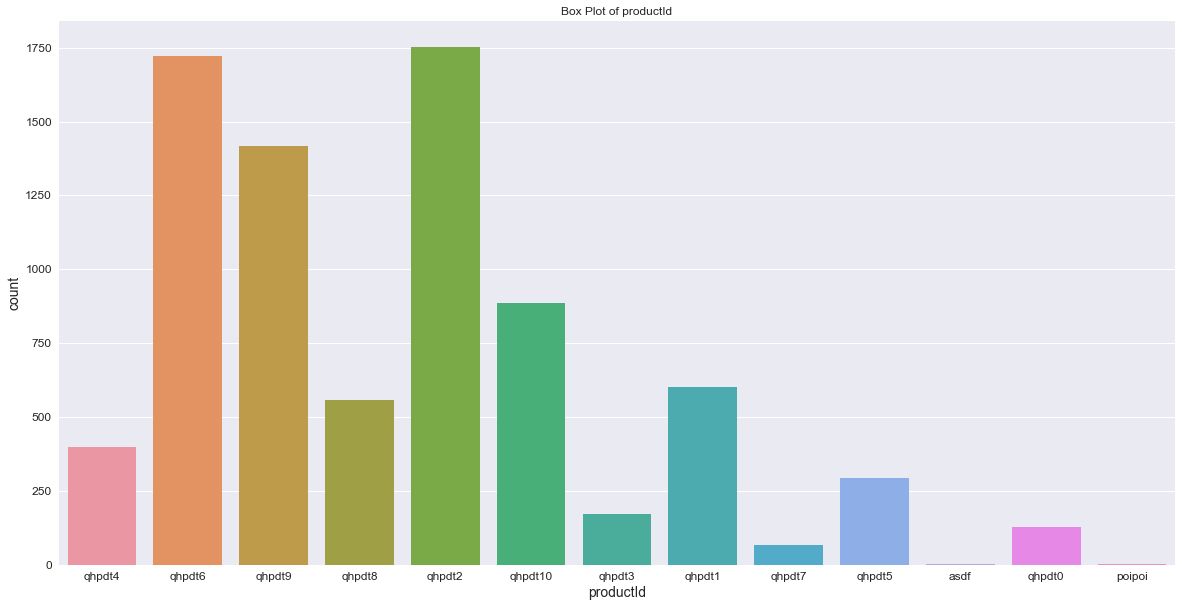

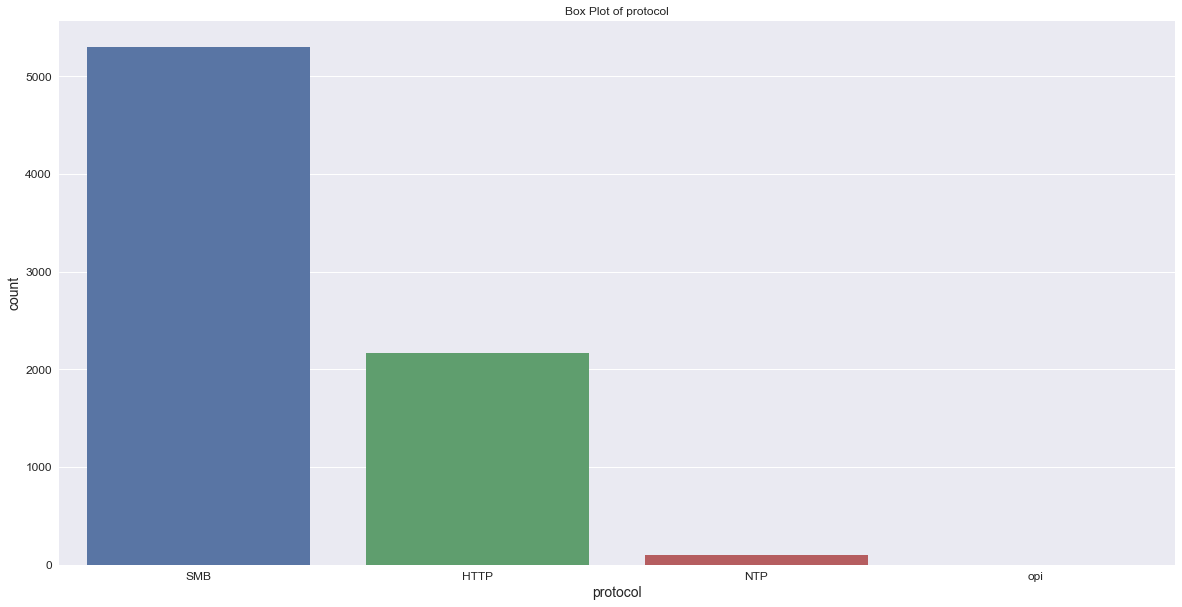

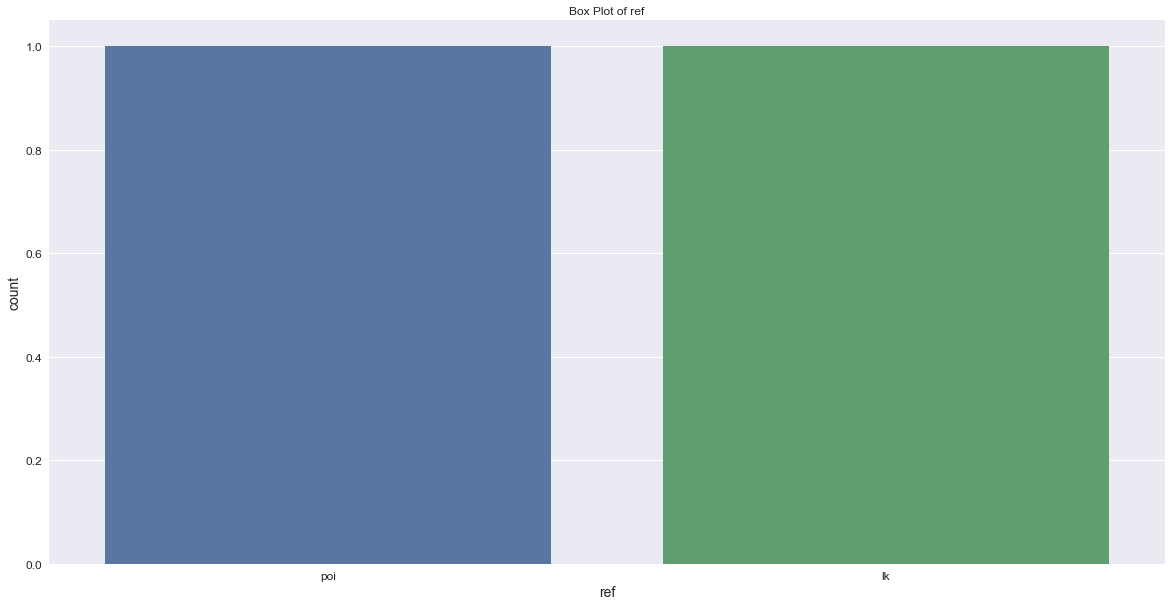

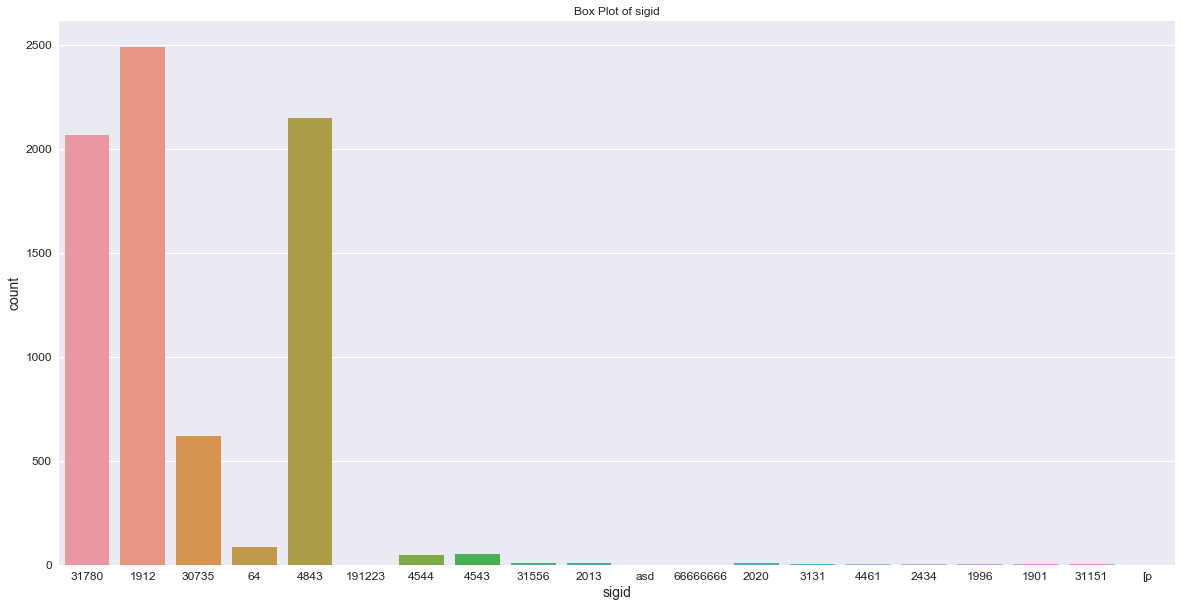

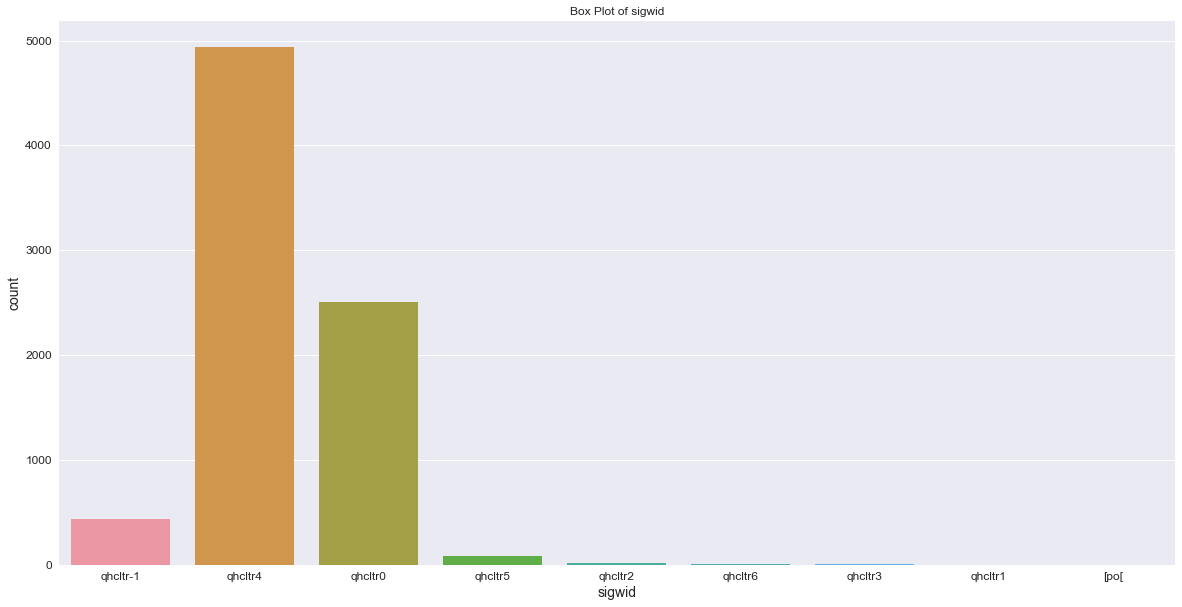

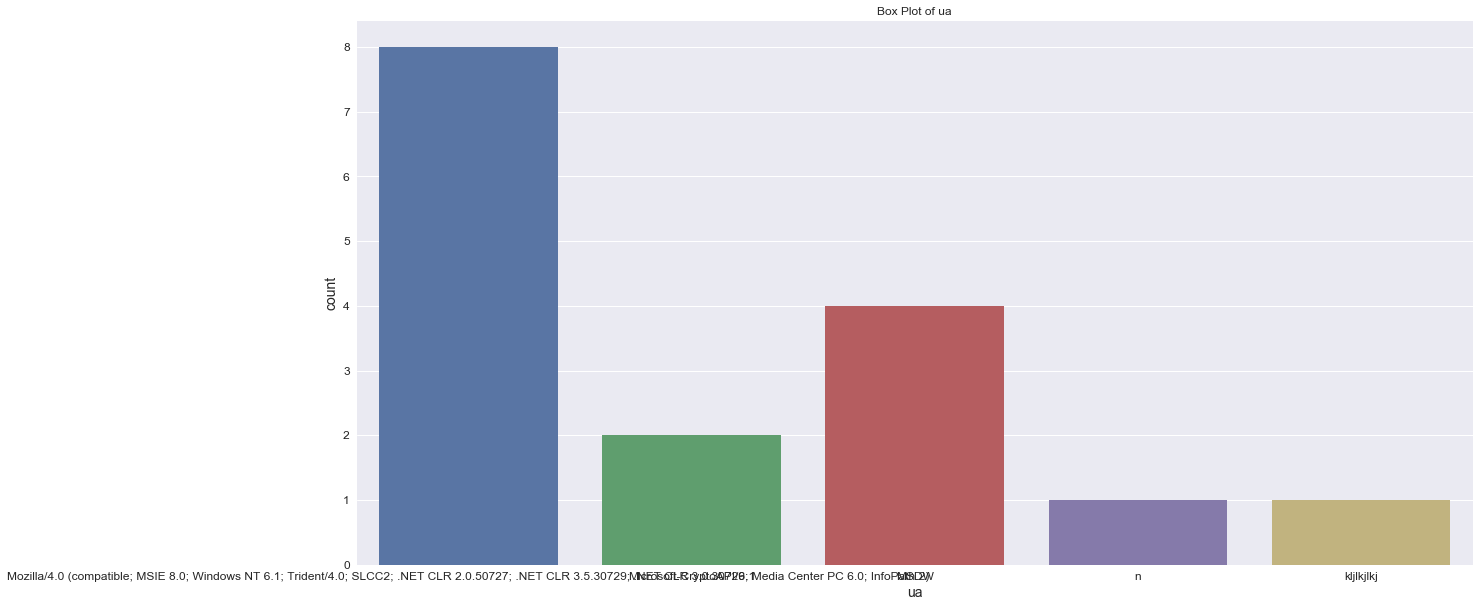

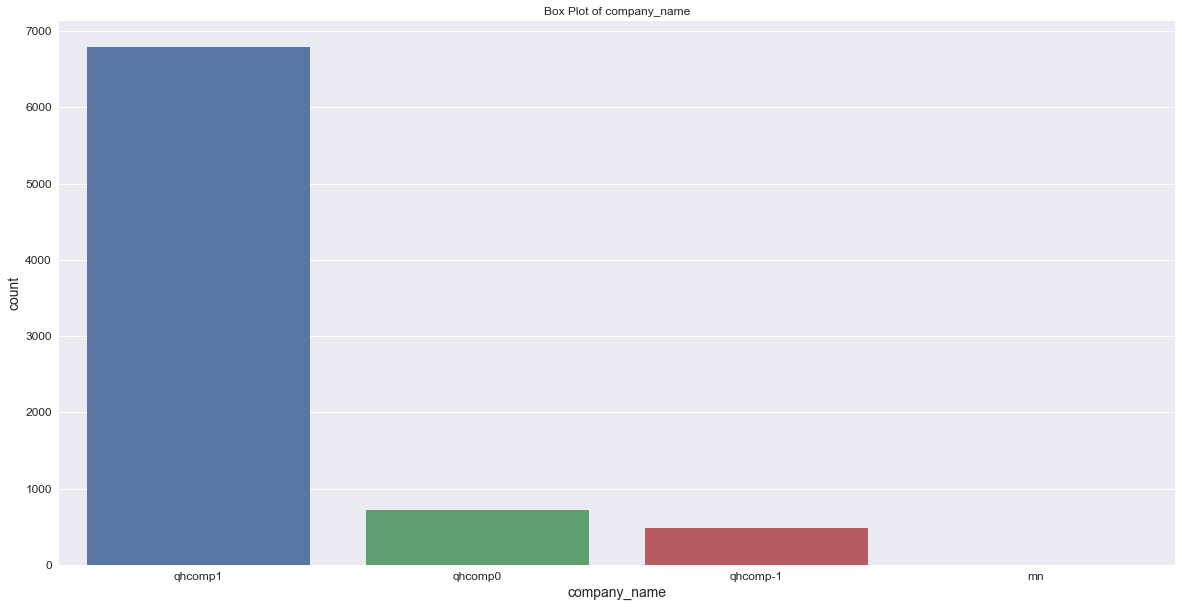

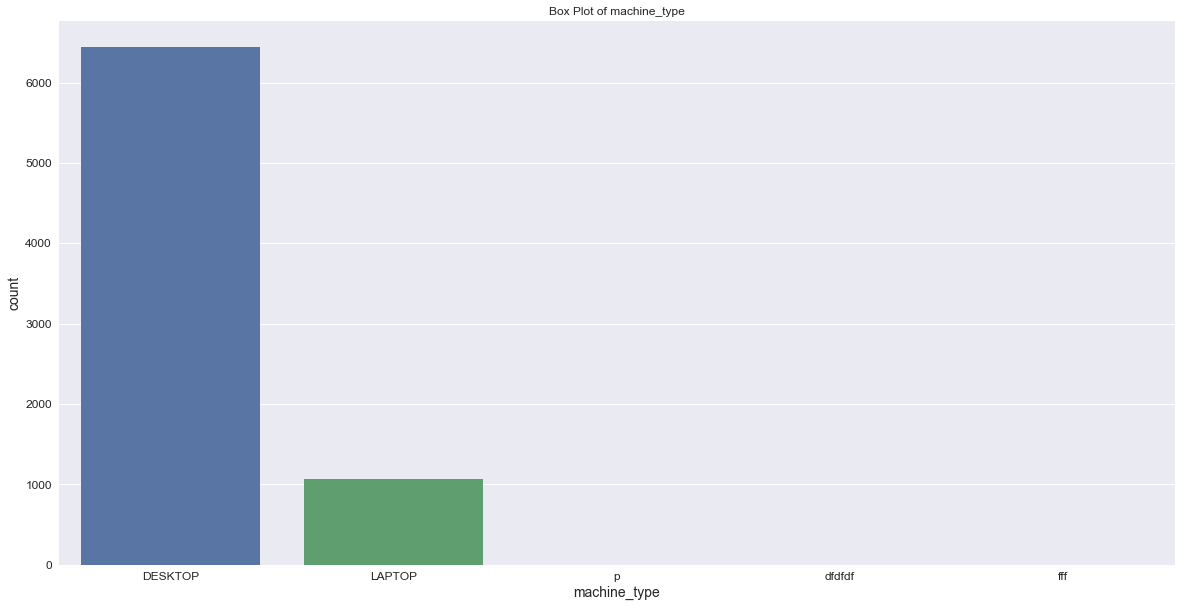

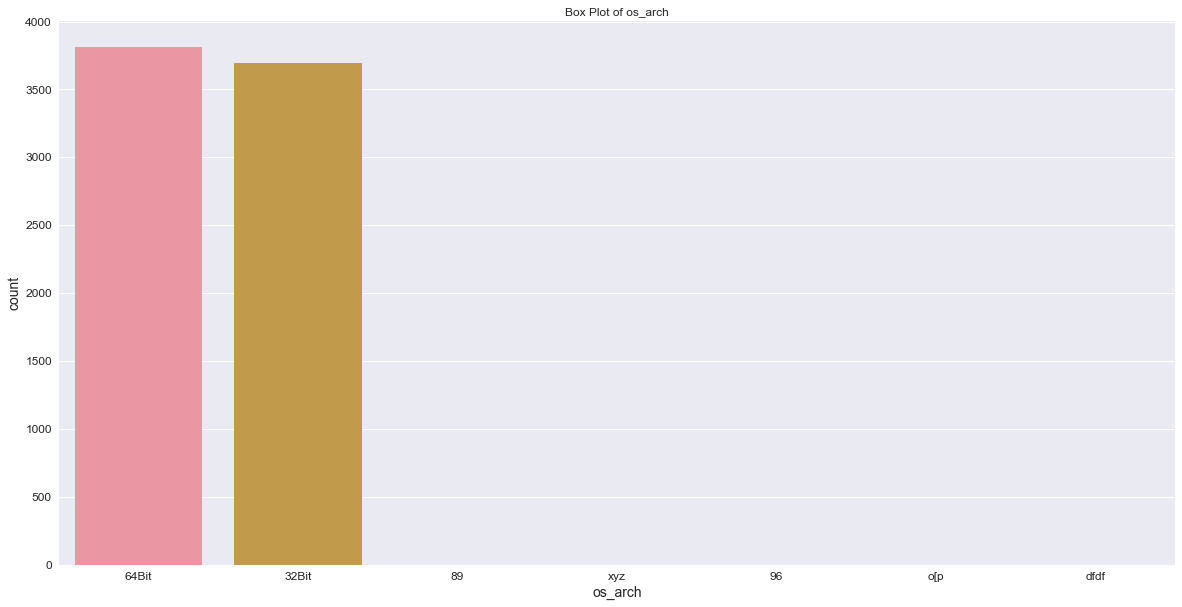

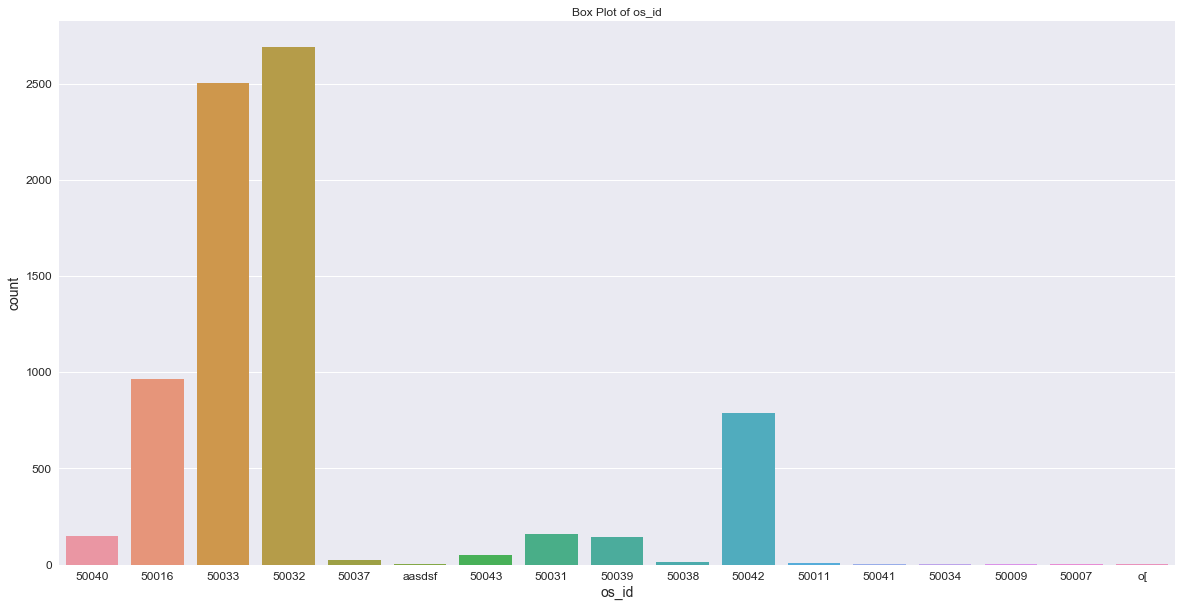

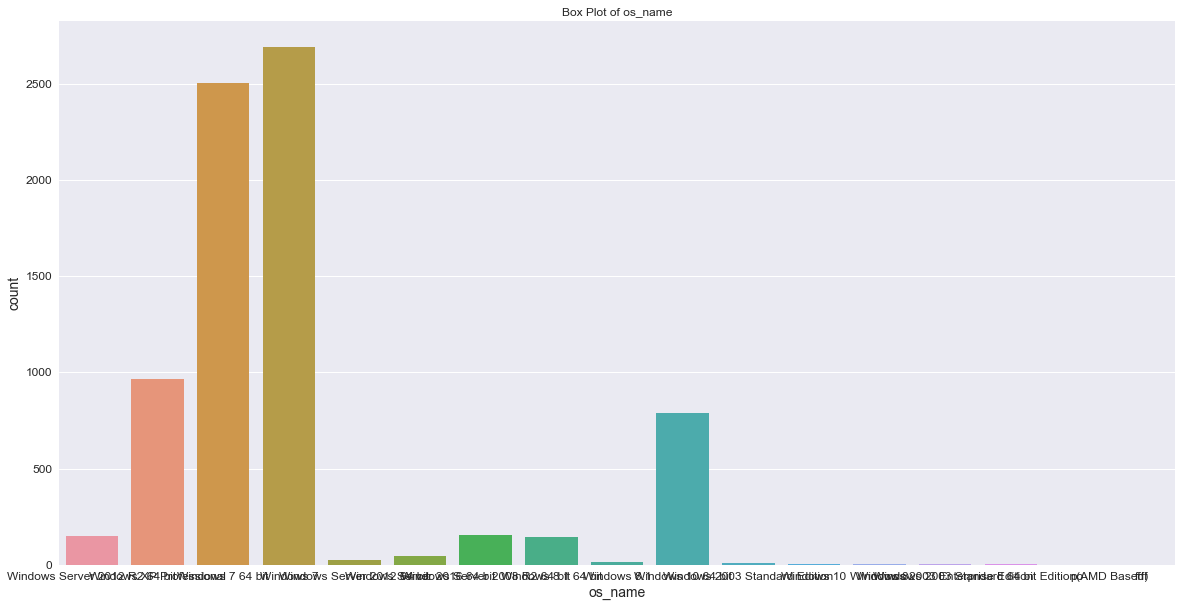

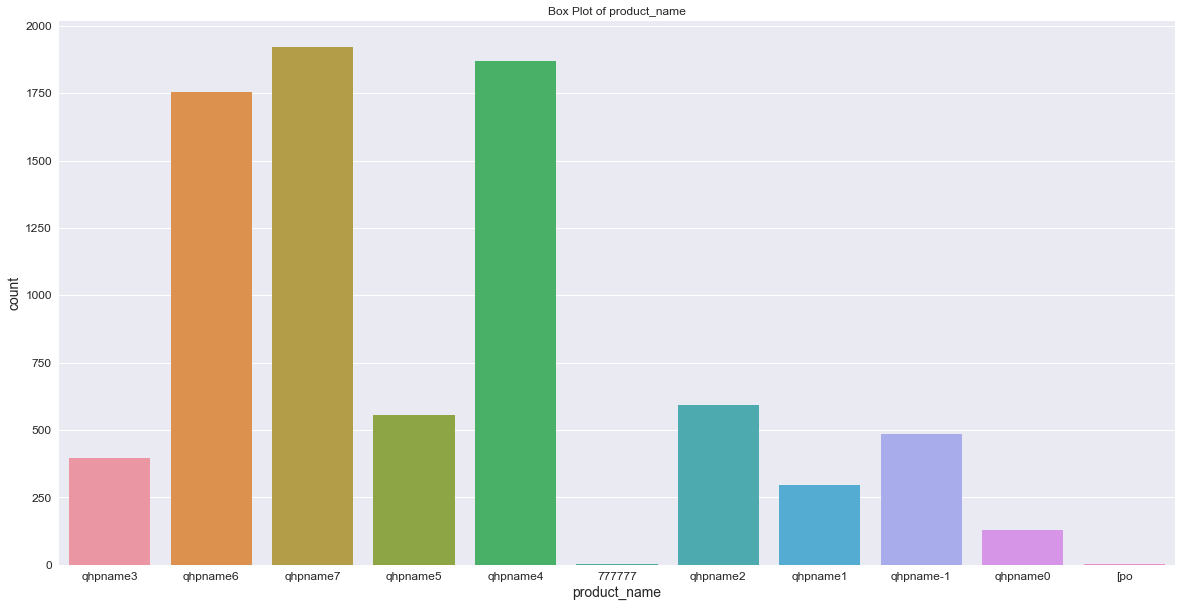

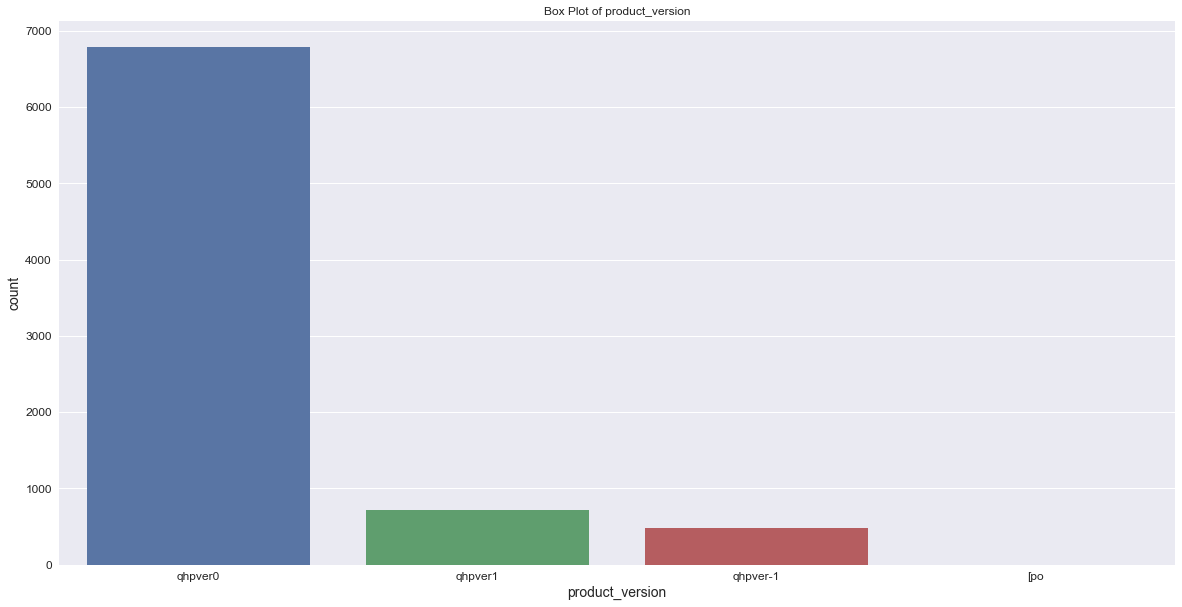

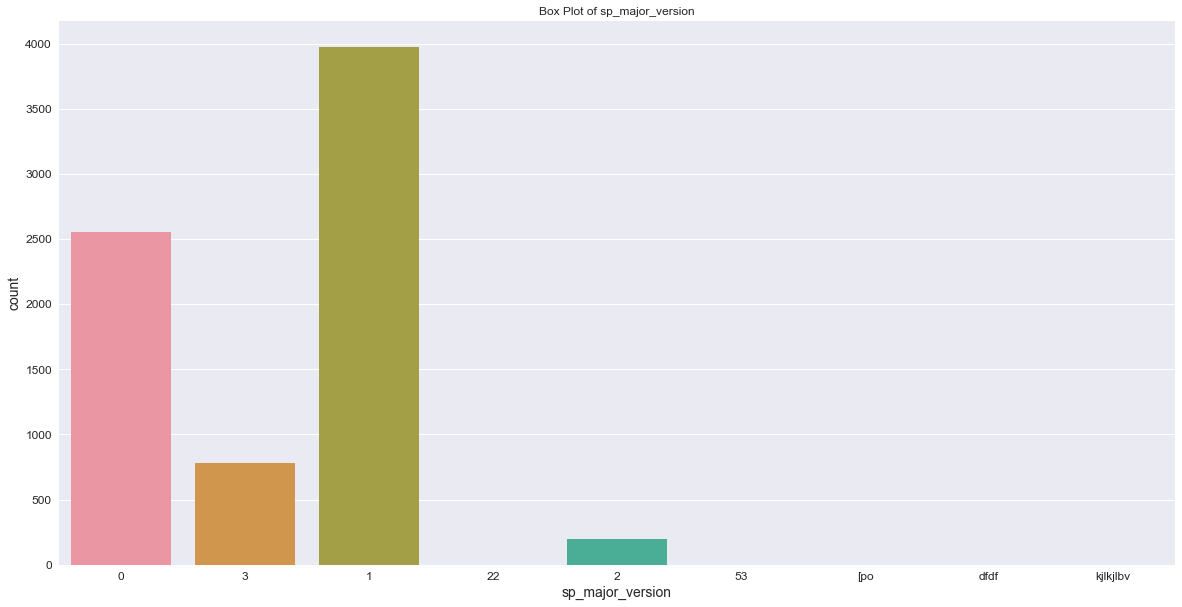

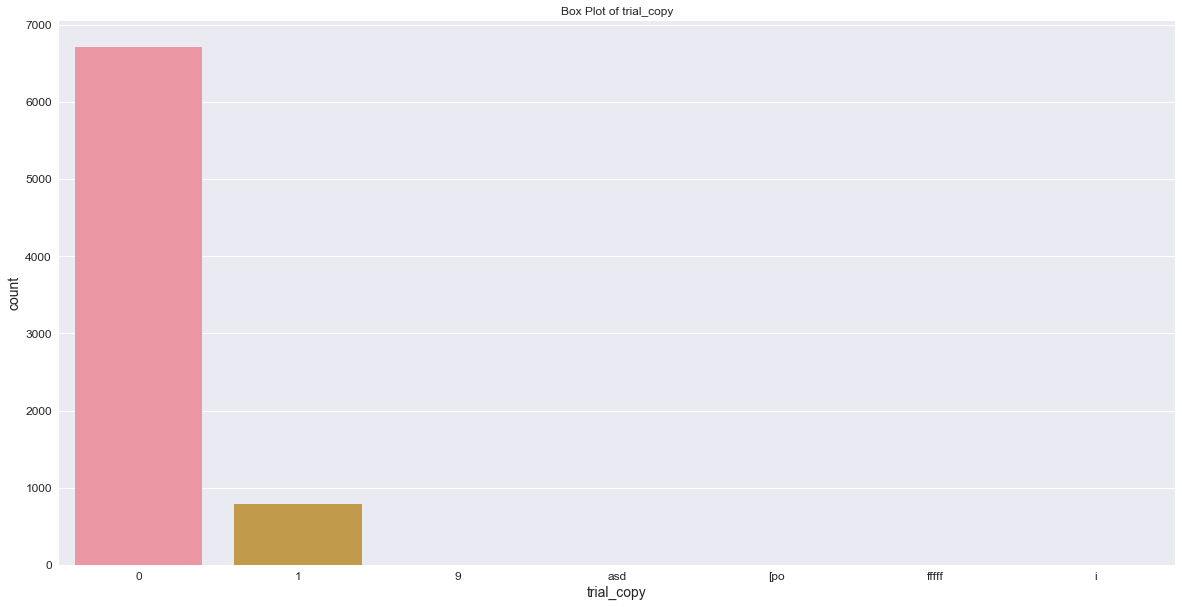

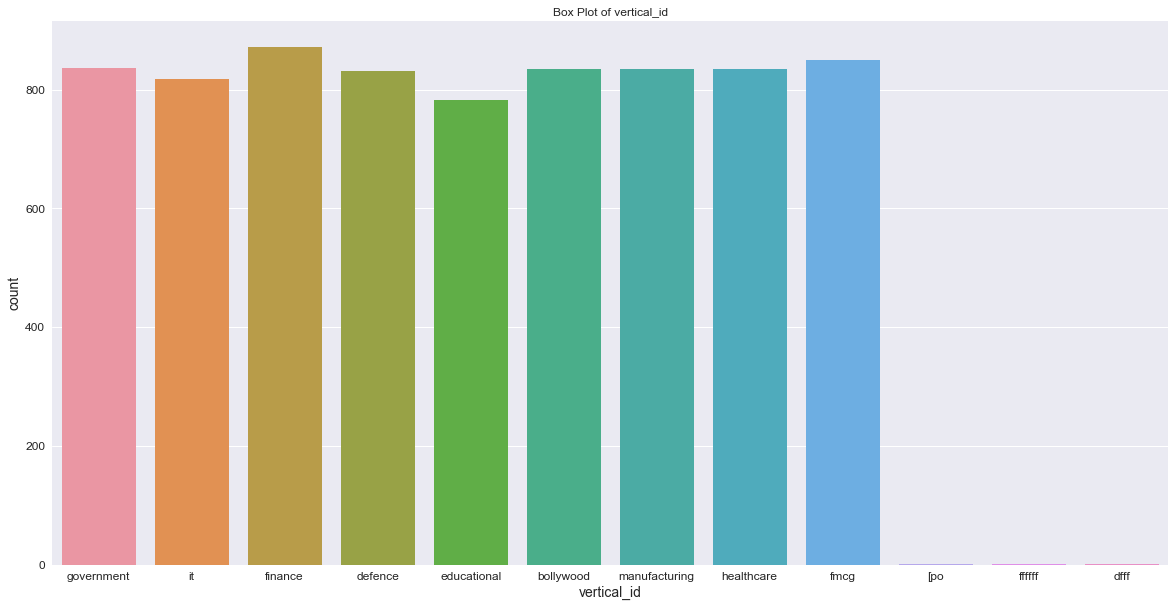

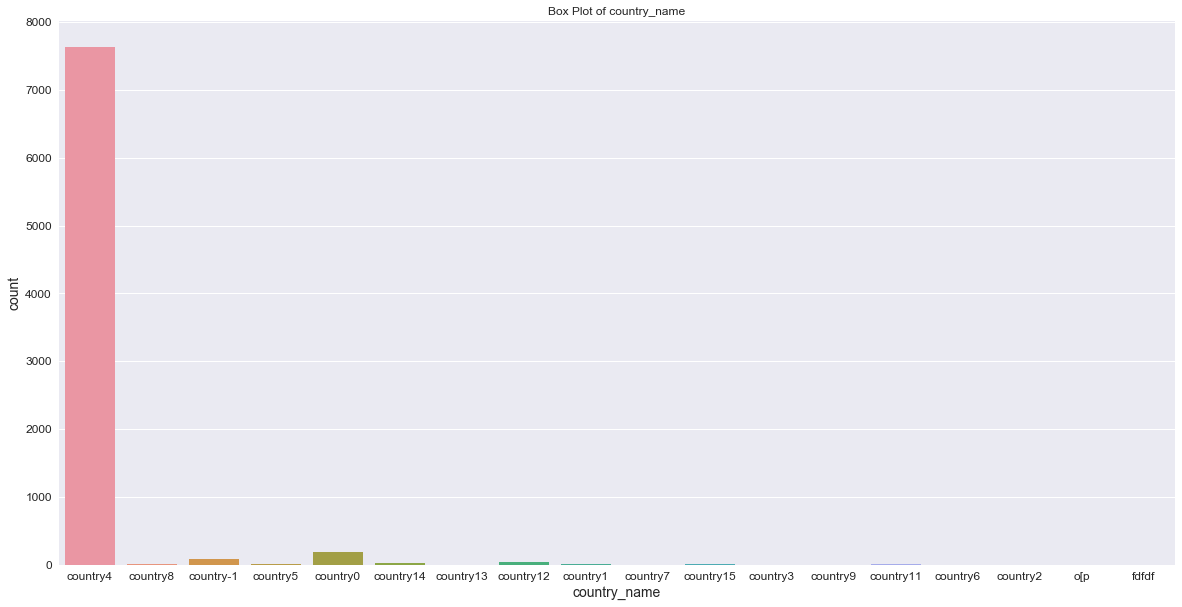

In [13]:
bp = PdfPages('BoxPlots with Univariate Object.pdf')
for cat_variable in cat_list:
    fig,axes = plt.subplots(figsize=(20,10))
    sns.countplot(x=cat_variable, data=IPS_df)
    plt.title(str('Box Plot of ') + str(cat_variable))
    bp.savefig(fig)
bp.close()

#### Data Issue demonstration :-

**dir**

In [14]:
IPS_df[IPS_df.dir == 'rtortrit[orit'].index.values

array([6536], dtype=int64)

In [15]:
IPS_df[IPS_df['dir'].isin(['rtortrit[orit','ggkjlkj','rotierti','asd','kjpjpo','kljlkjl','jjjjjjjjjjjjjjjjjjj','k','oipoipoi','lkjlkjlkj','p','asdf','poipoi','po[p','dfdfdf','mek','o','[p','[po[','[p[','qhcltr4','n','kljlkjlkj','mn','mno','fff','xyz','o[p','dfdf','aasdsf','o[','po','ffff','[po','777777','kjlkjlbv','iiiiii','fffff','i','ffffff','dfff','fdfdf','ffffffff'])]

,dir,local_ip,lp,mod,nm,prod,productId,protocol,ref,remote_ip,rp,sigid,sigwid,timestamp,ua,url,company_name,cust_id,last_vdb_timestamp,machine_type,os_arch,os_id,os_name,pkhash,product_name,product_version,sp_major_version,sp_minor_version,trial_copy,vdb_timestamp,vertical_id,city_name,country_name,real_region_name
6536,rtortrit[orit,rotierti,kjpjpo,blk,oipoipoi,p,poipoi,opi,poi,po[p,o,[p,[po[,po,n,mn,mn,",mn",o,p,o[p,o[,po,[po,[po,[po,[po,[po,[po,[po,[po,[p,o[p,o[p
7861,ggkjlkj,127.10.177.201,kljlkjl,kjl,k,lkjlkjlkj,qhpdt4,NTP,lk,167.199.211.97,123,4543,qhcltr4,2019-03-04T06:30:40.000Z,kljlkjlkj,NaN,qhcomp1,4e85cafdf959336c7e788446d6c80ab9,"02 March, 2019 (08:03:25)",fff,64Bit,50043,ffff,kjlkj,qhpname3,qhpver0,kjlkjlbv,0,i,"03 March, 2019 (08:09:50)",dfff,ffffff,fdfdf,region-1


** sigid **

In [16]:
#Sigid
IPS_df[IPS_df.sigid == '[p']

,dir,local_ip,lp,mod,nm,prod,productId,protocol,ref,remote_ip,rp,sigid,sigwid,timestamp,ua,url,company_name,cust_id,last_vdb_timestamp,machine_type,os_arch,os_id,os_name,pkhash,product_name,product_version,sp_major_version,sp_minor_version,trial_copy,vdb_timestamp,vertical_id,city_name,country_name,real_region_name
6536,rtortrit[orit,rotierti,kjpjpo,blk,oipoipoi,p,poipoi,opi,poi,po[p,o,[p,[po[,po,n,mn,mn,",mn",o,p,o[p,o[,po,[po,[po,[po,[po,[po,[po,[po,[po,[p,o[p,o[p


### Getting all the indexes

In [17]:
all_col = IPS_df.columns.difference(['nm','sigwid'])
print(all_col)

Index(['city_name', 'company_name', 'country_name', 'cust_id', 'dir',
       'last_vdb_timestamp', 'local_ip', 'lp', 'machine_type', 'mod',
       'os_arch', 'os_id', 'os_name', 'pkhash', 'prod', 'productId',
       'product_name', 'product_version', 'protocol', 'real_region_name',
       'ref', 'remote_ip', 'rp', 'sigid', 'sp_major_version',
       'sp_minor_version', 'timestamp', 'trial_copy', 'ua', 'url',
       'vdb_timestamp', 'vertical_id'],
      dtype='object')


#### Indexes having garbage value 

In [18]:
for x in all_col:
    print('\033[1m' + x)
    print ('\033[0m')
    print(IPS_df[IPS_df[x].isin(['rtortrit[orit','ggkjlkj','rotierti','asd','kjpjpo','kljlkjl','jjjjjjjjjjjjjjjjjjj','k','oipoipoi','lkjlkjlkj','p','asdf','poipoi','po[p','dfdfdf','mek','o','[p','[po[','[p[','qhcltr4','n','kljlkjlkj','mn','mno','fff','xyz','o[p','dfdf','aasdsf','o[','po','ffff','[po','777777','kjlkjlbv','iiiiii','fffff','i','ffffff','dfff','fdfdf','ffffffff'])].index.values)

city_name

[6536 7861]
company_name

[6536]
country_name

[6536 7861]
cust_id

[]
dir

[6536 7861]
last_vdb_timestamp

[6536]
local_ip

[6536]
lp

[ 436 6536 7861]
machine_type

[6536 7786 7861]
mod

[  66 3577 6809 7438]
os_arch

[ 373 6536 7786]
os_id

[ 200 6536]
os_name

[6536 7861]
pkhash

[6536 7786]
prod

[6536 7861]
productId

[ 825 6536]
product_name

[6536]
product_version

[6536]
protocol

[]
real_region_name

[6536 7787 7798]
ref

[]
remote_ip

[6536 7786]
rp

[ 623 6536 7786]
sigid

[ 756 6536]
sp_major_version

[6536 7786 7861]
sp_minor_version

[ 222 6536]
timestamp

[6536 7798]
trial_copy

[1516 6536 7786 7861]
ua

[6536 7861]
url

[6536]
vdb_timestamp

[6536 7786]
vertical_id

[6536 7786 7861]


### Data Cleaning and Manipulation

** We can remove the NAN rows - index 6141 and 118 **

In [19]:
IPS_df.drop(IPS_df.index[6141], inplace=True)

In [20]:
IPS_df.drop(IPS_df.index[118], inplace=True)

** Removing 17 indexes since they are have 3 or more garbage values in Key fields **

In [21]:
print("**** Delete multiple rows by Index Position ****")
IPS_df = IPS_df.drop([66,200,222,373,436,623,756,825,1516,3577,6536,6809,7438,7786,7787,7798,7861])

**** Delete multiple rows by Index Position ****


In [22]:
IPS_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7982 entries, 0 to 8000
Data columns (total 34 columns):
dir                   7982 non-null object
local_ip              7982 non-null object
lp                    7982 non-null object
mod                   7982 non-null object
nm                    7982 non-null object
prod                  7547 non-null object
productId             7982 non-null object
protocol              7547 non-null object
ref                   0 non-null object
remote_ip             7982 non-null object
rp                    7982 non-null object
sigid                 7547 non-null object
sigwid                7982 non-null object
timestamp             7982 non-null object
ua                    14 non-null object
url                   14 non-null object
company_name          7982 non-null object
cust_id               7976 non-null object
last_vdb_timestamp    7982 non-null object
machine_type          7498 non-null object
os_arch               7498 non-null obje

** Removing Data ambiguity **

** prod **

In [23]:
#WIN Win
IPS_df['prod'] = IPS_df['prod'].replace('Win', 'WIN', regex=True)

** sigwid **

In [24]:
IPS_df['sigwid'] = IPS_df['sigwid'].replace('qhcltr-1', 'qhcltr1', regex=True)

** company name **

In [25]:
IPS_df['company_name'] = IPS_df['company_name'].replace('qhcomp-1', 'qhcomp1', regex=True)

** product_name **

In [26]:
IPS_df['company_name'] = IPS_df['product_name'].replace('qhpname-1', 'qhpname1', regex=True)

** product_version **

In [27]:
IPS_df['product_version'] = IPS_df['product_version'].replace('qhpver-1', 'qhpver1', regex=True)

** real_region_name **

In [28]:
IPS_df['real_region_name'] = IPS_df['real_region_name'].replace('region-1', 'region1', regex=True)

** Anomalous fields **

** os_arch ** have two anomalous values -- 89 and 96 , rest are either 64 or 32 Bits

** company_name ** and ** product_name ** have anomalous values '777777' for the index 60

In [29]:
IPS_df[IPS_df.company_name == 777777].index.values

array([60], dtype=int64)

In [30]:
IPS_df[IPS_df.product_name == 777777].index.values

array([60], dtype=int64)

** Exporting cleaned data **

In [31]:
IPS_df.to_csv('IPS_df_cleaned.csv', index=False)

                ***********************************************************************

** PART 2 **

** Objective 2 **

    Creating Data Model

    Looks for anomalies & / or outliers in the data
        - Report any anomaly / outlier found in data

In [32]:
#importing cleaned IPS Data
IPS_df = pd.read_csv('IPS_df_cleaned.csv', encoding = 'utf-8')

In [33]:
IPS_df.head()

,dir,local_ip,lp,mod,nm,prod,productId,protocol,ref,remote_ip,rp,sigid,sigwid,timestamp,ua,url,company_name,cust_id,last_vdb_timestamp,machine_type,os_arch,os_id,os_name,pkhash,product_name,product_version,sp_major_version,sp_minor_version,trial_copy,vdb_timestamp,vertical_id,city_name,country_name,real_region_name
0,in,124.9.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,NaN,qhpdt4,NaN,NaN,90.811.108.100,62390,NaN,qhcltr1,2019-03-01T14:34:51.000Z,NaN,NaN,qhpname3,4e4789c041c1d9517f0b5648b3366a,"28 February, 2019 (10:52:05)",DESKTOP,64Bit,50040.0,Windows Server 2012 R2 64 bit,7fb5ef7c0113bd557ada5c0445ec91,qhpname3,qhpver0,0.0,0.0,0.0,"01 March, 2019 (08:08:51)",government,city141,country4,region31
1,in,83.131.177.201,734034,blk,SMB/EternalBlue.UN!SP.31780,UN,qhpdt6,SMB,NaN,19.131.177.921.,49915,31780.0,qhcltr4,2019-03-01T14:34:51.000Z,NaN,NaN,qhpname6,7a30bd86e7d0a29a98244774cb2d2b7a,"28 February, 2019 (10:52:05)",DESKTOP,32Bit,50016.0,Windows XP Professional,5194279487c0779a605e969aa950d338,qhpname6,qhpver0,3.0,0.0,0.0,"01 March, 2019 (08:08:31)",it,city170,country4,region40
2,in,124.9.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,NaN,qhpdt4,NaN,NaN,90.811.108.100,62390,NaN,qhcltr1,2019-03-01T14:34:51.000Z,NaN,NaN,qhpname3,4e4789c041c1d9517f0b5648b3366a,"28 February, 2019 (10:52:05)",DESKTOP,64Bit,50040.0,Windows Server 2012 R2 64 bit,7fb5ef7c0113bd557ada5c0445ec91,qhpname3,qhpver0,0.0,0.0,0.0,"01 March, 2019 (08:08:51)",finance,city141,country4,region31
3,in,83.131.177.277,734034,abc,SMB/EternalBlue.UN!SP.31780,UN,qhpdt6,SMB,NaN,19.131.177.921.,49915,31780.0,qhcltr4,2019-03-01T14:34:51.000Z,NaN,NaN,qhpname6,7a30bd86e7d0a29a98244774cb2d2b7a,"28 February, 2019 (10:52:05)",DESKTOP,32Bit,50016.0,Windows XP Professional,5194279487c0779a605e969aa950d338,qhpname6,qhpver0,3.0,0.0,0.0,"01 March, 2019 (08:08:31)",it,city170,country4,region40
4,in,109.9.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,NaN,qhpdt9,NaN,NaN,10.195.154.98,414811,NaN,qhcltr1,2019-03-04T06:27:25.000Z,NaN,NaN,qhpname7,8435d926acff7568edb434b5abdd917a,"02 March, 2019 (08:03:25)",DESKTOP,89,50033.0,Windows 7 64 bit,df4c090f2a82fc8323f90bb6ee374c19,qhpname7,qhpver0,1.0,0.0,0.0,"03 March, 2019 (08:09:50)",finance,city-1,country4,region1


** Dropping 'ref' it has very few NON NULL values **	

In [34]:
IPS_df.drop('ref', axis =1, inplace= True)

In [35]:
IPS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7982 entries, 0 to 7981
Data columns (total 33 columns):
dir                   7982 non-null object
local_ip              7982 non-null object
lp                    7982 non-null int64
mod                   7982 non-null object
nm                    7982 non-null object
prod                  7547 non-null object
productId             7982 non-null object
protocol              7547 non-null object
remote_ip             7982 non-null object
rp                    7982 non-null int64
sigid                 7547 non-null float64
sigwid                7982 non-null object
timestamp             7982 non-null object
ua                    14 non-null object
url                   14 non-null object
company_name          7982 non-null object
cust_id               7976 non-null object
last_vdb_timestamp    7982 non-null object
machine_type          7498 non-null object
os_arch               7498 non-null object
os_id                 7498 non-null fl

#### Dividing into numeric and categoric data

In [36]:
numeric_var_names=[key for key in dict(IPS_df.dtypes) if dict(IPS_df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(IPS_df.dtypes) if dict(IPS_df.dtypes)[key] in ['object']]
print ('**** Numerical variables *****')
print (numeric_var_names)
print ('**** Categorical variables *****')
print (cat_var_names)

**** Numerical variables *****
['lp', 'rp', 'sigid', 'os_id', 'sp_major_version', 'sp_minor_version', 'trial_copy']
**** Categorical variables *****
['dir', 'local_ip', 'mod', 'nm', 'prod', 'productId', 'protocol', 'remote_ip', 'sigwid', 'timestamp', 'ua', 'url', 'company_name', 'cust_id', 'last_vdb_timestamp', 'machine_type', 'os_arch', 'os_name', 'pkhash', 'product_name', 'product_version', 'vdb_timestamp', 'vertical_id', 'city_name', 'country_name', 'real_region_name']


In [37]:
IPS_df_num=IPS_df[numeric_var_names]
IPS_df_num.head(5)

,lp,rp,sigid,os_id,sp_major_version,sp_minor_version,trial_copy
0,94444,62390,NaN,50040.0,0.0,0.0,0.0
1,734034,49915,31780.0,50016.0,3.0,0.0,0.0
2,94444,62390,NaN,50040.0,0.0,0.0,0.0
3,734034,49915,31780.0,50016.0,3.0,0.0,0.0
4,94444,414811,NaN,50033.0,1.0,0.0,0.0


In [38]:
IPS_df_cat=IPS_df[cat_var_names]
IPS_df_cat.head(5)

,dir,local_ip,mod,nm,prod,productId,protocol,remote_ip,sigwid,timestamp,ua,url,company_name,cust_id,last_vdb_timestamp,machine_type,os_arch,os_name,pkhash,product_name,product_version,vdb_timestamp,vertical_id,city_name,country_name,real_region_name
0,in,124.9.177.201,blk,jjjjjjjjjjjjjjjjjjj,NaN,qhpdt4,NaN,90.811.108.100,qhcltr1,2019-03-01T14:34:51.000Z,NaN,NaN,qhpname3,4e4789c041c1d9517f0b5648b3366a,"28 February, 2019 (10:52:05)",DESKTOP,64Bit,Windows Server 2012 R2 64 bit,7fb5ef7c0113bd557ada5c0445ec91,qhpname3,qhpver0,"01 March, 2019 (08:08:51)",government,city141,country4,region31
1,in,83.131.177.201,blk,SMB/EternalBlue.UN!SP.31780,UN,qhpdt6,SMB,19.131.177.921.,qhcltr4,2019-03-01T14:34:51.000Z,NaN,NaN,qhpname6,7a30bd86e7d0a29a98244774cb2d2b7a,"28 February, 2019 (10:52:05)",DESKTOP,32Bit,Windows XP Professional,5194279487c0779a605e969aa950d338,qhpname6,qhpver0,"01 March, 2019 (08:08:31)",it,city170,country4,region40
2,in,124.9.177.201,blk,jjjjjjjjjjjjjjjjjjj,NaN,qhpdt4,NaN,90.811.108.100,qhcltr1,2019-03-01T14:34:51.000Z,NaN,NaN,qhpname3,4e4789c041c1d9517f0b5648b3366a,"28 February, 2019 (10:52:05)",DESKTOP,64Bit,Windows Server 2012 R2 64 bit,7fb5ef7c0113bd557ada5c0445ec91,qhpname3,qhpver0,"01 March, 2019 (08:08:51)",finance,city141,country4,region31
3,in,83.131.177.277,abc,SMB/EternalBlue.UN!SP.31780,UN,qhpdt6,SMB,19.131.177.921.,qhcltr4,2019-03-01T14:34:51.000Z,NaN,NaN,qhpname6,7a30bd86e7d0a29a98244774cb2d2b7a,"28 February, 2019 (10:52:05)",DESKTOP,32Bit,Windows XP Professional,5194279487c0779a605e969aa950d338,qhpname6,qhpver0,"01 March, 2019 (08:08:31)",it,city170,country4,region40
4,in,109.9.177.201,blk,jjjjjjjjjjjjjjjjjjj,NaN,qhpdt9,NaN,10.195.154.98,qhcltr1,2019-03-04T06:27:25.000Z,NaN,NaN,qhpname7,8435d926acff7568edb434b5abdd917a,"02 March, 2019 (08:03:25)",DESKTOP,89,Windows 7 64 bit,df4c090f2a82fc8323f90bb6ee374c19,qhpname7,qhpver0,"03 March, 2019 (08:09:50)",finance,city-1,country4,region1


#### Creating Data audit Report

** Numeric variables **

In [39]:
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=IPS_df_num.apply(lambda x: var_summary(x)).T

In [40]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
lp,7982.0,0.0,171238930.0,21453.135806,445.0,38533.394342,1.484822e+09,80.0,123.0,445.0,445.0,445.0,445.0,51791.75,60802.0,94444.00,94444.00,734034.0
rp,7982.0,0.0,297063488.0,37216.673515,51147.0,25553.086594,6.529602e+08,80.0,1202.0,3333.0,3333.0,3333.0,51147.0,56113.75,61732.4,63446.95,65058.52,414811.0
sigid,7547.0,435.0,167489758.0,22192.892275,4843.0,767369.371488,5.888558e+11,64.0,64.0,1912.0,1912.0,1912.0,4843.0,31780.00,31780.0,31780.00,31780.00,66666666.0
os_id,7498.0,484.0,375137364.0,50031.656975,50032.0,6.917276,4.784870e+01,50007.0,50016.0,50016.0,50016.0,50032.0,50032.0,50033.00,50042.0,50042.00,50042.00,50043.0
sp_major_version,7498.0,484.0,6778.0,0.903974,1.0,1.092303,1.193125e+00,0.0,0.0,0.0,0.0,0.0,1.0,1.00,3.0,3.00,3.00,53.0
sp_minor_version,7498.0,484.0,99.0,0.013204,0.0,1.143306,1.307149e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,99.0
trial_copy,7498.0,484.0,799.0,0.106562,0.0,0.323764,1.048229e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,1.00,1.00,9.0


** Replacing NANs with 0 for numeric columns **

In [41]:
IPS_df[numeric_var_names] = IPS_df[numeric_var_names].replace(np.nan, 0, regex=True)

** Categoric variables **

In [42]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=IPS_df_cat.apply(lambda x: cat_summary(x))

In [43]:
cat_summary

,dir,local_ip,mod,nm,prod,productId,protocol,remote_ip,sigwid,timestamp,ua,url,company_name,cust_id,last_vdb_timestamp,machine_type,os_arch,os_name,pkhash,product_name,product_version,vdb_timestamp,vertical_id,city_name,country_name,real_region_name
N,7982,7982,7982,7982,7547,7982,7547,7982,7982,7982,14,14,7982,7976,7982,7498,7498,7498,7982,7982,7982,7982,7480,7982,7982,7982
NMISS,0,0,0,0,435,0,435,0,0,0,7968,7968,0,6,0,484,484,484,0,0,0,0,502,0,0,0
ColumnsNames,"in 5813 out 2169 Name: dir, dtype: int64",8.97.177.201 259 236.9.31.811. 25...,blk 7939 mon 8 sdfds ...,SMB/CVE-2017-0147-EC.WIN!KP.1912 2489 H...,UN 2791 WIN 2610 CNC 2144 S...,qhpdt2 1749 qhpdt6 1720 qhpdt9 141...,SMB 5292 HTTP 2160 NTP 95 Name: p...,105.240.136.197 637 232.231.101.194 53...,qhcltr4 4925 qhcltr0 2503 qhcltr1 43...,2019-03-04T06:28:18.000Z 276 2019-03-04T06:...,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,www.bing.com/favicon.ico ...,qhpname7 1919 qhpname4 1865 qhpname6 ...,d7df250e6b1c37748c215b7653839ac6 256 e3e083...,"02 March, 2019 (08:03:05) 2430 02 March...",DESKTOP 6434 LAPTOP 1064 Name: machine_...,64Bit 3808 32Bit 3688 89 1 96 ...,Windows 7 ...,74861257f2b1f3768f5b31f2cc3d61fd 256 7fdc97...,qhpname7 1919 qhpname4 1865 qhpname6 ...,qhpver0 6777 qhpver1 1205 Name: product_...,"03 March, 2019 (08:09:34) 3566 03 March...",finance 872 fmcg 848 gove...,city-1 1703 city124 629 city144 62...,country4 7621 country0 184 country-1 ...,region1 1625 region26 1301 region42 ...


** Replacing NANs with SPACES for alphabetic columns **

In [44]:
IPS_df[cat_var_names] = IPS_df[cat_var_names].replace(np.nan, '', regex=True)

#### Detailed data profiling using pandas profiling

In [45]:
pandas_profiling.ProfileReport(IPS_df)

Number of variables,33
Number of observations,7982
Total Missing (%),0.0%
Total size in memory,2.0 MiB
Average record size in memory,264.0 B
Numeric,6
Categorical,26
Boolean,1
Date,0
Text (Unique),0
Rejected,0


** Some data analysis to see anomaly **

    There are 435 rows transactions where communication protocol and Application name initiating 
    connection (prod) is missing and signature (nm) is invalid (jjjjjjjjjjjjjjjjjjj).

In [46]:
IPS_df[IPS_df.protocol == ""]

,dir,local_ip,lp,mod,nm,prod,productId,protocol,remote_ip,rp,sigid,sigwid,timestamp,ua,url,company_name,cust_id,last_vdb_timestamp,machine_type,os_arch,os_id,os_name,pkhash,product_name,product_version,sp_major_version,sp_minor_version,trial_copy,vdb_timestamp,vertical_id,city_name,country_name,real_region_name
0,in,124.9.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,,qhpdt4,,90.811.108.100,62390,0.0,qhcltr1,2019-03-01T14:34:51.000Z,,,qhpname3,4e4789c041c1d9517f0b5648b3366a,"28 February, 2019 (10:52:05)",DESKTOP,64Bit,50040.0,Windows Server 2012 R2 64 bit,7fb5ef7c0113bd557ada5c0445ec91,qhpname3,qhpver0,0.0,0.0,0.0,"01 March, 2019 (08:08:51)",government,city141,country4,region31
2,in,124.9.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,,qhpdt4,,90.811.108.100,62390,0.0,qhcltr1,2019-03-01T14:34:51.000Z,,,qhpname3,4e4789c041c1d9517f0b5648b3366a,"28 February, 2019 (10:52:05)",DESKTOP,64Bit,50040.0,Windows Server 2012 R2 64 bit,7fb5ef7c0113bd557ada5c0445ec91,qhpname3,qhpver0,0.0,0.0,0.0,"01 March, 2019 (08:08:51)",finance,city141,country4,region31
4,in,109.9.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,,qhpdt9,,10.195.154.98,414811,0.0,qhcltr1,2019-03-04T06:27:25.000Z,,,qhpname7,8435d926acff7568edb434b5abdd917a,"02 March, 2019 (08:03:25)",DESKTOP,89,50033.0,Windows 7 64 bit,df4c090f2a82fc8323f90bb6ee374c19,qhpname7,qhpver0,1.0,0.0,0.0,"03 March, 2019 (08:09:50)",finance,city-1,country4,region1
5,in,333.11.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,,qhpdt4,,35.183.149.203,56824,0.0,qhcltr1,2019-03-04T06:27:25.000Z,,,qhpname3,aba630477ff23c2df39e01d7b247d800,"02 March, 2019 (08:03:25)",DESKTOP,64Bit,50040.0,Windows Server 2012 R2 64 bit,ddea43f3e27e4b9647318d0459473d1b,qhpname3,qhpver0,22.0,0.0,0.0,"03 March, 2019 (08:09:50)",defence,city-1,country4,region1
20,in,109.999.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,,qhpdt9,,10.195.154.98,414811,0.0,qhcltr1,2019-03-04T06:27:25.000Z,,,qhpname7,8435d926acff7568edb434b5abdd917a,"02 March, 2019 (08:03:25)",DESKTOP,64Bit,50033.0,Windows 7 64 bit,df4c090f2a82fc8323f90bb6ee374c19,qhpname7,qhpver0,1.0,0.0,0.0,"03 March, 2019 (08:09:50)",educational,city-1,country4,region1
21,in,113.11.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,,qhpdt4,,35.183.149.203,56824,0.0,qhcltr1,2019-03-04T06:27:25.000Z,,,qhpname3,aba630477ff23c2df39e01d7b247d800,"02 March, 2019 (08:03:25)",DESKTOP,64Bit,50040.0,Windows Server 2012 R2 64 bit,ddea43f3e27e4b9647318d0459473d1b,qhpname3,qhpver0,0.0,0.0,0.0,"03 March, 2019 (08:09:50)",defence,city-1,country4,region1
58,in,11.10.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,,qhpdt4,,143.88.69.199,51289,0.0,qhcltr1,2019-03-04T06:27:27.000Z,,,qhpname3,215f964d47dbf3a9778e605e4cd1b348,"02 March, 2019 (08:03:25)",DESKTOP,64Bit,50040.0,Windows Server 2012 R2 64 bit,77f4e6149f58c8d7b93d25ed22fb7faf,qhpname3,qhpver0,0.0,0.0,0.0,"03 March, 2019 (08:09:50)",fmcg,city155,country4,region28
134,in,11.10.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,,qhpdt4,,143.88.69.199,51289,0.0,qhcltr1,2019-03-04T06:27:27.000Z,,,qhpname3,215f964d47dbf3a9778e605e4cd1b348,"02 March, 2019 (08:03:25)",DESKTOP,64Bit,50040.0,Windows Server 2012 R2 64 bit,77f4e6149f58c8d7b93d25ed22fb7faf,qhpname3,qhpver0,0.0,0.0,0.0,"03 March, 2019 (08:09:50)",fmcg,city155,country4,region28
243,in,207.129.216.112,94444,blk,jjjjjjjjjjjjjjjjjjj,,qhpdt4,,249.54.209.127,55635,0.0,qhcltr1,2019-03-04T06:27:29.000Z,,,qhpname3,73732a43c3463f024136fb6d0e6b1a25,"02 March, 2019 (08:03:25)",DESKTOP,64Bit,50043.0,Windows Server 2016 64 bit,be8c2c6b93e35bf1625cdcfabdab234e,qhpname3,qhpver0,0.0,0.0,0.0,"03 March, 2019 (08:09:50)",educational,city-1,country4,region1
244,in,30.10.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,,qhpdt10,,30.213.247.75,3282,0.0,qhcltr1,2019-03-04T06:27:29.000Z,,,qhpname7,149e0d8bb383e446e63bcb70eed2cfd8,"02 March, 2019 (08:03:25)",DESKTOP,32Bit,50032.0,Windows 7,2d8e76a399e4cb4c400bc6216608081b,qhpname7,qhpver1,1.0,0.0,0.0,"03 March, 2019 (08:09:50)",defence,city199,country4,region22


In [47]:
IPS_df[IPS_df.protocol == ""].index.values

array([   0,    2,    4,    5,   20,   21,   58,  134,  243,  244,  262,
        263,  281,  296,  463,  464,  475,  476,  487,  498,  547,  548,
        549,  558,  559,  560,  569,  570,  581,  582,  593,  594,  605,
        606,  617,  632,  633,  736,  805,  912,  913,  922,  923,  932,
        933,  934,  948,  949,  950,  964,  965,  984,  985, 1030, 1045,
       1060, 1071, 1082, 1093, 1104, 1116, 1128, 1129, 1137, 1138, 1146,
       1156, 1166, 1167, 1189, 1190, 1212, 1219, 1226, 1242, 1258, 1259,
       1260, 1274, 1275, 1276, 1290, 1291, 1301, 1302, 1312, 1313, 1323,
       1324, 1334, 1375, 1416, 1428, 1492, 1493, 1500, 1501, 1653, 1654,
       1655, 1664, 1665, 1666, 1675, 1676, 1681, 1682, 1687, 1688, 1694,
       1695, 1759, 1760, 1766, 1767, 1795, 1808, 1821, 1830, 1851, 1852,
       1989, 1990, 2127, 2139, 2345, 2346, 2421, 2422, 2497, 2505, 2513,
       2526, 2561, 2562, 2563, 2579, 2580, 2581, 2597, 2610, 2779, 2787,
       2813, 2814, 2888, 2889, 2963, 2970, 2977, 29

** Preparing the data for further processing **

In [48]:
# Taking rows where there is NON - NULL Customer ID
IPS_df_mod = IPS_df[IPS_df.cust_id.isnull() != True]

In [49]:
IPS_df_mod.columns

Index(['dir', 'local_ip', 'lp', 'mod', 'nm', 'prod', 'productId', 'protocol',
       'remote_ip', 'rp', 'sigid', 'sigwid', 'timestamp', 'ua', 'url',
       'company_name', 'cust_id', 'last_vdb_timestamp', 'machine_type',
       'os_arch', 'os_id', 'os_name', 'pkhash', 'product_name',
       'product_version', 'sp_major_version', 'sp_minor_version', 'trial_copy',
       'vdb_timestamp', 'vertical_id', 'city_name', 'country_name',
       'real_region_name'],
      dtype='object')

** From the dataframe we can see 3 main categories of mode of transactions **

    - blk (Blocked) - B 
    - mon (Monitered) - M
    - def (Defended) - D
    - Others - O

### Model 1

# Converting the statement into Supervised Problem

    - I have used KNN, SVM and Naive Baye Classifier on block type
    - KNN and SVM models showing good accuracy on train and test data.

### Creating a predictive Model for "BLOCK ID"

In [50]:
def block(IPS_df_mod):
    if (IPS_df_mod['mod']  == 'blk'):
        return 'B'
    elif (IPS_df_mod['mod'] == 'mon'):
        return "M"
    elif (IPS_df_mod['mod']  == 'def'):
        return 'D'
    else:
        return 'O'

In [51]:
IPS_df_mod['BLOCK_IND'] = IPS_df_mod.apply(block, axis=1)

In [52]:
pd.pivot_table(IPS_df_mod,index=["BLOCK_IND"],values=["cust_id"],aggfunc='count')

,cust_id
BLOCK_IND,
B,7939
D,1
M,8
O,34


** Dropping original column **

In [53]:
IPS_df_mod.drop('mod', axis =1, inplace= True)

In [54]:
feature_columns = IPS_df_mod.columns.difference(['cust_id'])

In [55]:
df_test = IPS_df_mod.sample(frac=0.3)
df_test = df_test.reset_index()
print(df_test.index)
df_test.head()

RangeIndex(start=0, stop=2395, step=1)


,index,dir,local_ip,lp,nm,prod,productId,protocol,remote_ip,rp,sigid,sigwid,timestamp,ua,url,company_name,cust_id,last_vdb_timestamp,machine_type,os_arch,os_id,os_name,pkhash,product_name,product_version,sp_major_version,sp_minor_version,trial_copy,vdb_timestamp,vertical_id,city_name,country_name,real_region_name,BLOCK_IND
0,844,out,15.11.177.201,60553,HTTP/Coinminer.CNC!SP.4843,CNC,qhpdt2,HTTP,105.240.136.197,3333,4843.0,qhcltr4,2019-03-04T06:27:44.000Z,,,qhpname4,9455beaab44a80e5c4f503fefb1b26e5,"28 February, 2019 (10:52:05)",DESKTOP,64Bit,50042.0,Windows 10 64 bit,d88745d87f53f4ec5bf09d10d0cf5aeb,qhpname4,qhpver0,0.0,0.0,0.0,"03 March, 2019 (08:09:34)",it,city-1,country4,region1,B
1,244,in,30.10.177.201,94444,jjjjjjjjjjjjjjjjjjj,,qhpdt10,,30.213.247.75,3282,0.0,qhcltr1,2019-03-04T06:27:29.000Z,,,qhpname7,149e0d8bb383e446e63bcb70eed2cfd8,"02 March, 2019 (08:03:25)",DESKTOP,32Bit,50032.0,Windows 7,2d8e76a399e4cb4c400bc6216608081b,qhpname7,qhpver1,1.0,0.0,0.0,"03 March, 2019 (08:09:50)",defence,city199,country4,region22,B
2,3436,in,212.10.177.201,445,SMB/CVE-2017-0147-EC.WIN!KP.1912,WIN,qhpdt9,SMB,13.10.177.921.,49889,1912.0,qhcltr0,2019-03-04T06:28:53.000Z,,,qhpname7,ec3da1722c13daa40fbbae8afe6613e2,"01 March, 2019 (13:09:08)",LAPTOP,64Bit,50033.0,Windows 7 64 bit,3d5bed8147c01b96caf7d91007e034c2,qhpname7,qhpver0,0.0,0.0,0.0,"03 March, 2019 (08:09:50)",educational,city97,country4,region25,B
3,4385,out,14.10.177.201,64895,HTTP/Coinminer.CNC!SP.4843,CNC,qhpdt0,HTTP,143.251.137.187,3333,4843.0,qhcltr4,2019-03-04T06:29:20.000Z,,,qhpname0,e74109bacb177d26a0fb7615322e21f3,"01 March, 2019 (17:38:36)",DESKTOP,64Bit,50042.0,Windows 10 64 bit,24995e07b24de599e2db7672e8fe5d7d,qhpname0,qhpver0,0.0,0.0,0.0,"01 March, 2019 (22:48:17)",manufacturing,city139,country4,region39,B
4,4716,in,239.10.177.201,94444,jjjjjjjjjjjjjjjjjjj,,qhpdt9,,106.243.105.75,51832,0.0,qhcltr1,2019-03-04T06:29:28.000Z,,,qhpname7,a064bfe06101c5691b0357e326de47e2,"02 March, 2019 (08:03:25)",DESKTOP,64Bit,50033.0,Windows 7 64 bit,053df7905d41e655c9825de0fd394470,qhpname7,qhpver0,0.0,0.0,0.0,"03 March, 2019 (08:09:50)",educational,city36,country4,region20,B


In [56]:
df_train = IPS_df_mod.drop(df_test.index)
df_train = df_train.reset_index()
print(df_train.index)
df_train.head()

RangeIndex(start=0, stop=5587, step=1)


,index,dir,local_ip,lp,nm,prod,productId,protocol,remote_ip,rp,sigid,sigwid,timestamp,ua,url,company_name,cust_id,last_vdb_timestamp,machine_type,os_arch,os_id,os_name,pkhash,product_name,product_version,sp_major_version,sp_minor_version,trial_copy,vdb_timestamp,vertical_id,city_name,country_name,real_region_name,BLOCK_IND
0,2395,out,135.10.177.201,52679,HTTP/Coinminer.CNC!SP.4843,CNC,qhpdt6,HTTP,105.240.136.197,3333,4843.0,qhcltr4,2019-03-04T06:28:24.000Z,,,qhpname6,07b0b8c17391d19bbe4f208c31018763,"02 December, 2018 (05:42:21)",DESKTOP,64Bit,50042.0,Windows 10 64 bit,640b2f875632d997671d61dfe10f9266,qhpname6,qhpver0,0.0,0.0,0.0,"03 December, 2018 (04:13:43)",educational,city144,country4,region26,B
1,2396,out,135.10.177.201,52680,HTTP/Coinminer.CNC!SP.4843,CNC,qhpdt6,HTTP,105.240.136.197,3333,4843.0,qhcltr4,2019-03-04T06:28:24.000Z,,,qhpname6,07b0b8c17391d19bbe4f208c31018763,"02 December, 2018 (05:42:21)",DESKTOP,64Bit,50042.0,Windows 10 64 bit,640b2f875632d997671d61dfe10f9266,qhpname6,qhpver0,0.0,0.0,0.0,"03 December, 2018 (04:13:43)",finance,city144,country4,region26,B
2,2397,out,135.10.177.201,52681,HTTP/Coinminer.CNC!SP.4843,CNC,qhpdt6,HTTP,105.240.136.197,3333,4843.0,qhcltr4,2019-03-04T06:28:24.000Z,,,qhpname6,07b0b8c17391d19bbe4f208c31018763,"02 December, 2018 (05:42:21)",DESKTOP,64Bit,50042.0,Windows 10 64 bit,640b2f875632d997671d61dfe10f9266,qhpname6,qhpver0,0.0,0.0,0.0,"03 December, 2018 (04:13:43)",manufacturing,city144,country4,region26,B
3,2398,out,135.10.177.201,52682,HTTP/Coinminer.CNC!SP.4843,CNC,qhpdt6,HTTP,105.240.136.197,3333,4843.0,qhcltr4,2019-03-04T06:28:24.000Z,,,qhpname6,07b0b8c17391d19bbe4f208c31018763,"02 December, 2018 (05:42:21)",DESKTOP,64Bit,50042.0,Windows 10 64 bit,640b2f875632d997671d61dfe10f9266,qhpname6,qhpver0,0.0,0.0,0.0,"03 December, 2018 (04:13:43)",defence,city144,country4,region26,B
4,2399,out,135.10.177.201,52683,HTTP/Coinminer.CNC!SP.4843,CNC,qhpdt6,HTTP,105.240.136.197,3333,4843.0,qhcltr4,2019-03-04T06:28:24.000Z,,,qhpname6,07b0b8c17391d19bbe4f208c31018763,"02 December, 2018 (05:42:21)",DESKTOP,64Bit,50042.0,Windows 10 64 bit,640b2f875632d997671d61dfe10f9266,qhpname6,qhpver0,0.0,0.0,0.0,"03 December, 2018 (04:13:43)",government,city144,country4,region26,B


### Scaling Numerical Attributes

In [57]:
df_train.drop(['cust_id'], axis=1, inplace=True)

In [58]:
df_test.drop(['cust_id'], axis=1, inplace=True)

In [59]:
df_train.drop(['index'], axis=1, inplace=True)

In [60]:
df_test.drop(['index'], axis=1, inplace=True)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = df_train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(df_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(df_test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

### Encoding of Categorical Attributes

In [62]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = df_train.select_dtypes(include=['object']).copy()
cattest = df_test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['BLOCK_IND'], axis=1)
enctest = testcat.drop(['BLOCK_IND'], axis=1)

cat_Ytrain = traincat[['BLOCK_IND']].copy()
cat_Ytest = testcat[['BLOCK_IND']].copy()

### Data Sampling

In [63]:
import imblearn.over_sampling as os

In [64]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

# define columns and extract encoded train set for sampling 
sc_traindf = df_train.select_dtypes(include=['float64','int64'])
refclasscol = pd.concat([sc_traindf, enctrain], axis=1).columns
refclass = np.concatenate((sc_train, enctrain.values), axis=1)
X = refclass

# reshape target column to 1D array shape  
c, r = cat_Ytest.values.shape
y_test = cat_Ytest.values.reshape(c,)

c, r = cat_Ytrain.values.shape
y = cat_Ytrain.values.reshape(c,)


# apply the random over-sampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_sample(X, y)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 5564, 2: 19, 1: 4})
Resampled dataset shape Counter({0: 5564, 2: 5564, 1: 5564})


### Feature Selection

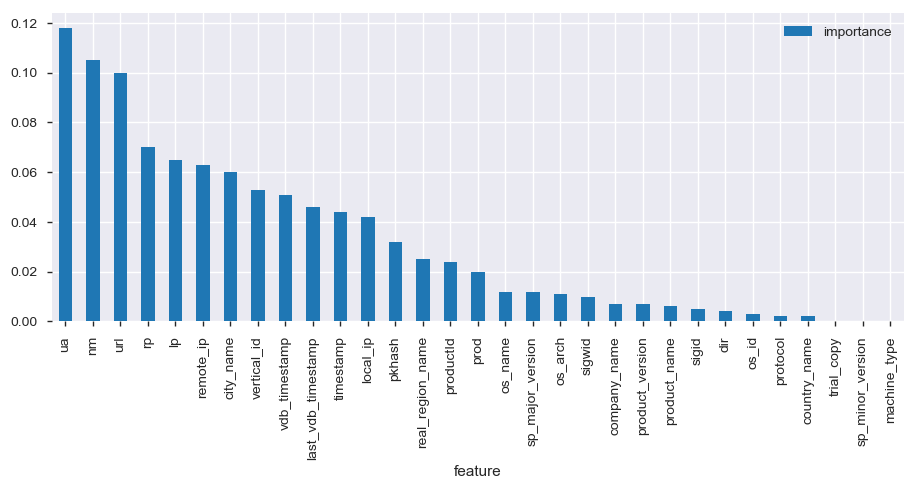

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# fit random forest classifier on the training set
rfc.fit(X_res, y_res)

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':refclasscol,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [66]:
import itertools

In [67]:
#Using Recursive feature elmination
#The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

#It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

from sklearn.feature_selection import RFE

import itertools

rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(X_res, y_res)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), refclasscol)]
selected_features = [v for i, v in feature_map if i==True]

In [68]:
selected_features

['lp',
 'rp',
 'sigid',
 'local_ip',
 'nm',
 'productId',
 'remote_ip',
 'timestamp',
 'ua',
 'last_vdb_timestamp',
 'os_name',
 'vdb_timestamp',
 'vertical_id',
 'city_name',
 'real_region_name']

### Finalize data preprocessing for training

In [69]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [70]:
X_train = pd.concat([sc_traindf, enctrain], axis=1)
Y_train = cat_Ytrain

X_test = pd.concat([sc_testdf, enctest], axis=1)
Y_test = cat_Ytest

### Models

In [71]:

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

In [72]:
# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [73]:
# Train SVM Model
SVC_Classifier = SVC(random_state=0)
SVC_Classifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [74]:
grpclass = "Normal Attack"

## Evaluate Models

In [75]:
from sklearn import metrics

models = []
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('SVM Classifier', SVC_Classifier))

#models.append(('VotingClassifier', VotingClassifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} {} Model Evaluation =============================='.format(grpclass, i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Normal Attack KNeighborsClassifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9965997806624435

Model Accuracy:
 0.9965992482548774

Confusion matrix:
 [[5564    0    0]
 [   0    4    0]
 [  19    0    0]]

Classification report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      5564
          1       1.00      1.00      1.00         4
          2       0.00      0.00      0.00        19

avg / total       0.99      1.00      0.99      5587



============================== Normal Attack Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9103935079852292

Model Accuracy:
 0.9377125469840701

Confusion matrix:
 [[5231    0  333]
 [   0    4    0]
 [  15    0    4]]

Classification report:
              precision    recall  f1-score   support

          0       1.00      0.94      0.97      5564
          1       1

## Test Models

In [76]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} {} Model Test Results =============================='.format(grpclass, i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        



============================== Normal Attack KNeighborsClassifier Model Test Results ==============================

Model Accuracy:
 0.9924843423799582

Confusion matrix:
 [[2377    0    0    0]
 [   1    0    0    0]
 [   3    0    0    0]
 [  14    0    0    0]]

Classification report:
              precision    recall  f1-score   support

          0       0.99      1.00      1.00      2377
          1       0.00      0.00      0.00         1
          2       0.00      0.00      0.00         3
          3       0.00      0.00      0.00        14

avg / total       0.99      0.99      0.99      2395



============================== Normal Attack Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.8263048016701461

Confusion matrix:
 [[1979    1  397    0]
 [   1    0    0    0]
 [   0    3    0    0]
 [  10    0    4    0]]

Classification report:
              precision    recall  f1-score   support

          0       0.99      0.83      0

    ***************************************************************************************

### Model 2

## Converting the statement to UnSupervised Problem

    Identifying anamolous events by clustering
    
    We can see 12 events have been separately clustered:-
    
    A. All of them are having Malicious or Miner signature
    B. All of them are having product of either qhpdt2 or qhpdt5 and product version qhpver0
    C. All 12 of these events are having remote_ip 209.206.88.213 or 103.62.226.32
        with sigid 31556 or 4461
    D. They all originate for region1 or region16
    
These 12 events belongs to cust_id :-


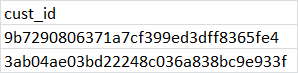


** Taking on columns having valid customer id **

In [77]:
IPS_df_un = IPS_df[IPS_df.cust_id.isnull() != True]

In [78]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
IPS_df_mod_num = IPS_df_un[numeric_var_names].copy()
IPS_df_mod_cat = IPS_df_un[cat_var_names].copy()


# encode the categorical attributes
IPS_df_mod_cat_en = IPS_df_mod_cat.apply(encoder.fit_transform)
#IPS_df_mod_cat_en.drop(['cust_id'], axis=1, inplace=True)

In [79]:
IPS_df_en = pd.concat((IPS_df_mod_num, IPS_df_mod_cat_en), axis=1)

#### Standardizing the data

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
sc=StandardScaler()

In [82]:
IPS_df_scaled=sc.fit_transform(IPS_df_en)

#### Silhouette Coefficient

In [83]:
from sklearn import metrics
#metrics.silhouette_score(credit_scaled, km_4.labels_)

In [84]:
# calculate SC for K=3 through K=12
k_range = range(3, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(IPS_df_scaled)
    scores.append(metrics.silhouette_score(IPS_df_scaled, km.labels_))

In [85]:
scores

[0.23458719313658613,
 0.16645102933091763,
 0.21397354192324694,
 0.1287934261282142,
 0.15460447474049027,
 0.1983561363157854,
 0.16990000839615696,
 0.1462505791642937,
 0.1759298161700363]

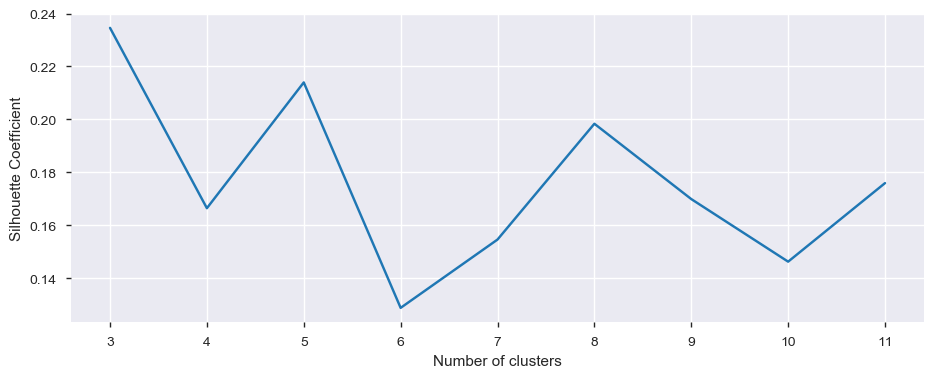

In [86]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### Clustering the data - KMEANS

In [87]:
from sklearn.cluster import KMeans

In [88]:
km_5=KMeans(n_clusters=5,random_state=123)

In [89]:
km_5.fit(IPS_df_scaled)
km_5.labels_

array([4, 4, 4, 4, 0, 1, 0, 0, 1, 1, 4, 4, 1, 1, 1, 1, 4, 4, 1, 1, 0, 4,
       0, 0, 1, 1, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 4, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 4, 0, 0, 0, 0,

In [90]:
pd.Series(km_5.labels_).value_counts()

1    2708
4    2391
0    2387
2     484
3      12
dtype: int64

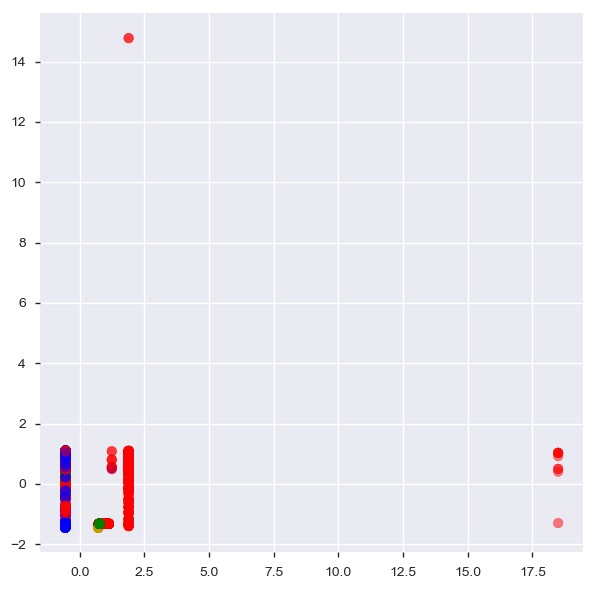

In [91]:
color_map={0:'r', 1:'b', 2:'g', 3:'y', 4:'r'}
label_color = [color_map[l] for l in km_5.labels_]
plt.figure(figsize=(7,7))
plt.scatter(IPS_df_scaled[:,0], IPS_df_scaled[:,1], c=label_color,cmap='Spectral',alpha=0.5)

In [92]:
IPS_df_df_5=pd.concat([IPS_df_un, pd.Series(km_5.labels_, name='Cluster_5')], axis=1)

In [93]:
IPS_df_df_5.head()

,dir,local_ip,lp,mod,nm,prod,productId,protocol,remote_ip,rp,sigid,sigwid,timestamp,ua,url,company_name,cust_id,last_vdb_timestamp,machine_type,os_arch,os_id,os_name,pkhash,product_name,product_version,sp_major_version,sp_minor_version,trial_copy,vdb_timestamp,vertical_id,city_name,country_name,real_region_name,Cluster_5
0,in,124.9.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,,qhpdt4,,90.811.108.100,62390,0.0,qhcltr1,2019-03-01T14:34:51.000Z,,,qhpname3,4e4789c041c1d9517f0b5648b3366a,"28 February, 2019 (10:52:05)",DESKTOP,64Bit,50040.0,Windows Server 2012 R2 64 bit,7fb5ef7c0113bd557ada5c0445ec91,qhpname3,qhpver0,0.0,0.0,0.0,"01 March, 2019 (08:08:51)",government,city141,country4,region31,4
1,in,83.131.177.201,734034,blk,SMB/EternalBlue.UN!SP.31780,UN,qhpdt6,SMB,19.131.177.921.,49915,31780.0,qhcltr4,2019-03-01T14:34:51.000Z,,,qhpname6,7a30bd86e7d0a29a98244774cb2d2b7a,"28 February, 2019 (10:52:05)",DESKTOP,32Bit,50016.0,Windows XP Professional,5194279487c0779a605e969aa950d338,qhpname6,qhpver0,3.0,0.0,0.0,"01 March, 2019 (08:08:31)",it,city170,country4,region40,4
2,in,124.9.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,,qhpdt4,,90.811.108.100,62390,0.0,qhcltr1,2019-03-01T14:34:51.000Z,,,qhpname3,4e4789c041c1d9517f0b5648b3366a,"28 February, 2019 (10:52:05)",DESKTOP,64Bit,50040.0,Windows Server 2012 R2 64 bit,7fb5ef7c0113bd557ada5c0445ec91,qhpname3,qhpver0,0.0,0.0,0.0,"01 March, 2019 (08:08:51)",finance,city141,country4,region31,4
3,in,83.131.177.277,734034,abc,SMB/EternalBlue.UN!SP.31780,UN,qhpdt6,SMB,19.131.177.921.,49915,31780.0,qhcltr4,2019-03-01T14:34:51.000Z,,,qhpname6,7a30bd86e7d0a29a98244774cb2d2b7a,"28 February, 2019 (10:52:05)",DESKTOP,32Bit,50016.0,Windows XP Professional,5194279487c0779a605e969aa950d338,qhpname6,qhpver0,3.0,0.0,0.0,"01 March, 2019 (08:08:31)",it,city170,country4,region40,4
4,in,109.9.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,,qhpdt9,,10.195.154.98,414811,0.0,qhcltr1,2019-03-04T06:27:25.000Z,,,qhpname7,8435d926acff7568edb434b5abdd917a,"02 March, 2019 (08:03:25)",DESKTOP,89,50033.0,Windows 7 64 bit,df4c090f2a82fc8323f90bb6ee374c19,qhpname7,qhpver0,1.0,0.0,0.0,"03 March, 2019 (08:09:50)",finance,city-1,country4,region1,0


In [94]:
IPS_df_df_5.to_csv('IPS_df_df_5.csv')

** Cluster 3 seems to be having segregated from the rest with 12 anomaly events:- **

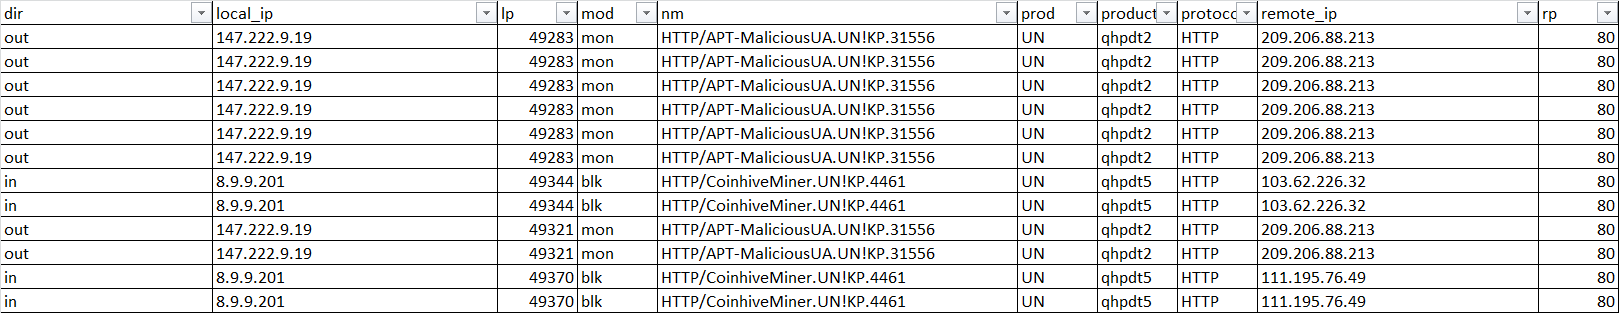


In this problem we have done the follwing -

    A. Data Analysis and descriptive understanding of data.
    B. Data Level anomaly detection.
    C. Model 1 - Classification on Block type.
    C. Model 2 - Segmentation to find anomalous cluster.

                ********************************* END ********************************